In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
# understat import for understat api
import asyncio
import json
import aiohttp
from understat import Understat
import sys,importlib
# importlib.reload(sys.modules['function'])
from function import *

In [10]:
year = ['2014','2015','2016','2017','2018','2019','2020']

modèle regression logistique 
* résultat :
    * européen
    * non-européen

* Critère défense : 
    * valeur
    * taille
    * vitesse
    * expérience
    * (poid)

# Projet 8 - MHSC, européen ?

Préparation des données

In [5]:
ligue_df_all = []
async def main():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        for i in year:
            table = await understat.get_league_table("Ligue 1", i)
            ligue_df = pd.DataFrame(data=table)
            ligue_df['year'] = i
            ligue_df['Rank'] = ligue_df.index
            ligue_df_all.append(ligue_df)
        df = pd.concat(ligue_df_all)
        return df
loop = asyncio.get_event_loop()
import nest_asyncio
nest_asyncio.apply()
df_ligue = loop.run_until_complete(main())
df_ligue.columns = df_ligue.iloc[0]
df_ligue = df_ligue[1:] 
df_ligue.rename(columns={'2014':'Years',0:'Rank'},inplace=True)
df_ligue = df_ligue[['Rank','Team','M','W','D','L','G','GA','PTS','xG','xGA','xPTS','Years']]

In [6]:
df_ligue.iloc[50:100]

,Rank,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,Years
9,9,Rennes,38,12,14,12,36,42,50,41.81,43.54,50.94,2016
10,10,Guingamp,38,14,8,16,46,53,50,47.14,52.31,48.49,2016
11,11,Lille,38,13,7,18,40,47,46,44.08,48.77,47.24,2016
12,12,Angers,38,13,7,18,40,49,46,46.19,41.02,54.69,2016
13,13,Toulouse,38,10,14,14,37,41,44,41.19,42.98,50.61,2016
14,14,Metz,38,11,10,17,39,72,43,34.76,63.68,36.0,2016
15,15,Montpellier,38,10,9,19,48,66,39,44.2,52.03,47.03,2016
16,16,Dijon,38,8,13,17,46,58,37,38.59,62.66,36.73,2016
17,17,Caen,38,10,7,21,36,65,37,45.28,56.47,45.49,2016
18,18,Lorient,38,10,6,22,44,70,36,44.46,51.88,46.81,2016


In [7]:
euro_crew = ['fc-paris-saint-germain', 'olympique-lyon', 'as-monaco', 'losc-lille','olympique-marseille', 'as-saint-etienne', 'ogc-nizza', 'stade-reims','fc-stade-rennes','montpellier-hsc',
             'fc-girondins-bordeaux','ea-guingamp','sm-caen','fc-toulouse','dijon-fco','nimes-olympique','as-nancy-lorraine','fc-metz','fc-nantes','rc-lens',
             'amiens-sc','sc-bastia','rc-strassburg-alsace','stade-brest-29','fc-lorient','sco-angers','es-troyes-ac','thonon-evian-grand-geneve-fc']
num = ['583','1041','162','1082','244','618','417','1421','273','969','40','855','1162','415','2969','1160','1159','347','995','826','1416','595','667','3911','1158','1420','1095','14171']
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

In [8]:
header_crew = ['Position', 'Valeur maximum']
df_crew = []

for eq,num_eq in zip(euro_crew,num):
    if eq == 'thonon-evian-grand-geneve-fc':
        for k in year[:3]:
            page = "https://www.transfermarkt.fr/"+eq+"/kader/verein/"+num_eq+"/plus/0/galerie/0?saison_id="+k
            pageTree = requests.get(page, headers=headers)
            soup = BeautifulSoup(pageTree.content, 'html.parser')
            value = soup.find('div',{'class':'large-8 columns'}).div.find('div',{'class':'responsive-table'}).table.tbody.find_all('tr')
            list_attribute = []
            list_money_money = []
            table_list = []
            for i in value:
                try:
                    money = i.find('td',{'class':'rechts hauptlink'}).text
                    if 'K' in money:
                        list_money_money.append(float(money.split(' ')[0])/1000)
                        text = i.find('td',{'class':'posrela'}).table.find_all('tr')[1].text
                        list_attribute.append(text)
                    elif 'mio' in money:
                        list_money_money.append(float(money.split(' ')[0].replace(',','.')))
                        text = i.find('td',{'class':'posrela'}).table.find_all('tr')[1].text
                        list_attribute.append(text)

                except AttributeError:
                    continue

            table_list.append(list_attribute)
            table_list.append(list_money_money)
            value_crew = pd.DataFrame(data=table_list,index=header_crew)
            value_crew.columns = value_crew.iloc[0]
            value_crew = value_crew.iloc[1:]
            value_crew = value_crew.T
            value_crew['Years'] = k
            value_crew['Crew'] = eq
            value_crew = value_crew.reset_index()

            #print(value_crew)
            value_crew_max = value_crew.sort_values(by='Valeur maximum',ascending=False)
            gardien = value_crew_max[value_crew_max['Position'] == 'Gardien de but'].iloc[0:1]
            defenseur = value_crew_max[(value_crew_max['Position'] == 'Défenseur central')|(value_crew_max['Position'] == 'Arrière gauche')|(value_crew_max['Position'] == 'Arrière droit')].iloc[0:1]
            milieu = value_crew_max[(value_crew_max['Position'] == 'Milieu défensif')|(value_crew_max['Position'] == 'Milieu central')|(value_crew_max['Position'] == 'Milieu offensif')].iloc[0:1]
            attaquant = value_crew_max[(value_crew_max['Position'] == 'Ailier droit')|(value_crew_max['Position'] == 'Ailier gauche')|(value_crew_max['Position'] == 'Avant-centre')].iloc[0:1]
            total = value_crew_max.iloc[0:1]

            gardien['Position'] = 'Gardien'
            defenseur['Position'] = 'Défense'
            milieu['Position'] = 'Milieu'
            attaquant['Position'] = 'Attaquant'
            total['Position'] = 'Total'
            value_crew_all = pd.concat([gardien,defenseur,milieu,attaquant,total])
            df_crew.append(value_crew_all)
    else:
        for k in year:
            print(eq,k)
            page = "https://www.transfermarkt.fr/"+eq+"/kader/verein/"+num_eq+"/plus/0/galerie/0?saison_id="+k
            pageTree = requests.get(page, headers=headers)
            soup = BeautifulSoup(pageTree.content, 'html.parser')
            value = soup.find('div',{'class':'large-8 columns'}).div.find('div',{'class':'responsive-table'}).table.tbody.find_all('tr')
            list_attribute = []
            list_money_money = []
            table_list = []
            for i in value:
                try:
                    money = i.find('td',{'class':'rechts hauptlink'}).text
                    if 'K' in money:
                        list_money_money.append(float(money.split(' ')[0])/1000)
                        text = i.find('td',{'class':'posrela'}).table.find_all('tr')[1].text
                        list_attribute.append(text)
                    elif 'mio' in money:
                        list_money_money.append(float(money.split(' ')[0].replace(',','.')))
                        text = i.find('td',{'class':'posrela'}).table.find_all('tr')[1].text
                        list_attribute.append(text)

                except AttributeError:
                    continue

            table_list.append(list_attribute)
            table_list.append(list_money_money)
            value_crew = pd.DataFrame(data=table_list,index=header_crew)
            value_crew.columns = value_crew.iloc[0]
            value_crew = value_crew.iloc[1:]
            value_crew = value_crew.T
            value_crew['Years'] = k
            value_crew['Crew'] = eq
            value_crew = value_crew.reset_index()

            #print(value_crew)
            value_crew_max = value_crew.sort_values(by='Valeur maximum',ascending=False)
            gardien = value_crew_max[value_crew_max['Position'] == 'Gardien de but'].iloc[0:1]
            defenseur = value_crew_max[(value_crew_max['Position'] == 'Défenseur central')|(value_crew_max['Position'] == 'Arrière gauche')|(value_crew_max['Position'] == 'Arrière droit')].iloc[0:1]
            milieu = value_crew_max[(value_crew_max['Position'] == 'Milieu défensif')|(value_crew_max['Position'] == 'Milieu central')|(value_crew_max['Position'] == 'Milieu offensif')].iloc[0:1]
            attaquant = value_crew_max[(value_crew_max['Position'] == 'Ailier droit')|(value_crew_max['Position'] == 'Ailier gauche')|(value_crew_max['Position'] == 'Avant-centre')].iloc[0:1]
            total = value_crew_max.iloc[0:1]

            gardien['Position'] = 'Gardien'
            defenseur['Position'] = 'Défense'
            milieu['Position'] = 'Milieu'
            attaquant['Position'] = 'Attaquant'
            total['Position'] = 'Total'
            value_crew_all = pd.concat([gardien,defenseur,milieu,attaquant,total])
            df_crew.append(value_crew_all)
df_value_max = pd.concat(df_crew)

fc-paris-saint-germain 2014


<ipython-input-8-7e3c7f6e32b9>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['Position'] = 'Total'


fc-paris-saint-germain 2015
fc-paris-saint-germain 2016
fc-paris-saint-germain 2017


KeyboardInterrupt: 

In [ ]:
df_crew = []
header_crew = ['Positions', 'Âge', 'Valeur marchande', 'Valeur marchande moyenne']
for eq,num_eq in zip(euro_crew,num):
    print(eq)
    if eq == 'thonon-evian-grand-geneve-fc':
        for k in year[:3]:

            page = "https://www.transfermarkt.fr/"+eq+"/kader/verein/"+num_eq+"/plus/0/galerie/0?saison_id="+k
            pageTree = requests.get(page, headers=headers)
            soup = BeautifulSoup(pageTree.content, 'html.parser')
            body = soup.html.find('div',{'class':'large-4 columns'}).find('div',{'class':'box'}).table.tbody.find_all('td')
            foot = soup.html.find('div',{'class':'large-4 columns'}).find('div',{'class':'box'}).table.tfoot.find_all('tr')
            x = 0
            table_list = [header_crew]
            body_list = []
            for g in body:

                body_list.append(g.text)
                x = x + 1
                if x == 5:
                    table_list.append(body_list[1:])
                    body_list = []
                    x = 0

            for h in foot: 
                foot_list = []
                for gk2 in h.find_all('td'):
                    foot_list.append(gk2.text)
                table_list.append(foot_list)

            value_crew = pd.DataFrame(data=table_list)
            value_crew.columns = value_crew.iloc[0]
            value_crew = value_crew.iloc[1:]
            #print(value_crew,k)
            value_crew['Years'] = k
            value_crew['Crew'] = eq
            df_crew.append(value_crew)
    else:
        for k in year:

            page = "https://www.transfermarkt.fr/"+eq+"/kader/verein/"+num_eq+"/plus/0/galerie/0?saison_id="+k
            pageTree = requests.get(page, headers=headers)
            soup = BeautifulSoup(pageTree.content, 'html.parser')
            body = soup.html.find('div',{'class':'large-4 columns'}).find('div',{'class':'box'}).table.tbody.find_all('td')
            foot = soup.html.find('div',{'class':'large-4 columns'}).find('div',{'class':'box'}).table.tfoot.find_all('tr')
            x = 0
            table_list = [header_crew]
            body_list = []
            for g in body:

                body_list.append(g.text)
                x = x + 1
                if x == 5:
                    table_list.append(body_list[1:])
                    body_list = []
                    x = 0

            for h in foot: 
                foot_list = []
                for gk2 in h.find_all('td'):
                    foot_list.append(gk2.text)
                table_list.append(foot_list)

            value_crew = pd.DataFrame(data=table_list)
            value_crew.columns = value_crew.iloc[0]
            value_crew = value_crew.iloc[1:]
            #print(value_crew,k)
            value_crew['Years'] = k
            value_crew['Crew'] = eq
            df_crew.append(value_crew)
#print(df_crew)
df_euro_all = pd.concat(df_crew)

In [ ]:
df_euro_all[df_euro_all['Crew'] == ' paris saint germain']

In [ ]:
# df_euro_all[['Position', 'Valeur maximum', 'Valeur marchande (millions)','Valeur marchande moyenne (millions)', 'Years', 'Crew']]

In [ ]:
df_euro_all = df_euro_all[df_euro_all['Valeur marchande (millions)'] != '-']

In [ ]:
df_euro_all['Valeur marchande (millions)'] = [i.replace(',','.') for i in df_euro_all['Valeur marchande (millions)']]
df_euro_all['Valeur marchande moyenne (millions)'] = [i.replace(',','.') for i in df_euro_all['Valeur marchande moyenne (millions)']]

In [ ]:
df_euro_all.rename(columns={'Valeur marchande':'Valeur marchande (millions)','Valeur marchande moyenne':'Valeur marchande moyenne (millions)'},inplace=True)
df_euro_all['Valeur marchande (millions)'] = [i.replace(',','.') for i in df_euro_all['Valeur marchande (millions)']]
df_euro_all['Valeur marchande moyenne (millions)'] = [i.replace(',','.') for i in df_euro_all['Valeur marchande moyenne (millions)']]
df_euro_all['Valeur marchande (millions)'] = [i.replace(' mio. €','') for i in df_euro_all['Valeur marchande (millions)']]
df_euro_all['Valeur marchande moyenne (millions)'] = [i.replace(' mio. €','') for i in df_euro_all['Valeur marchande moyenne (millions)']]
df_euro_all['Valeur marchande (millions)'] = [float(i.replace(' K €',''))/1000 for i in df_euro_all['Valeur marchande (millions)']]
df_euro_all['Valeur marchande moyenne (millions)'] = [float(i.replace(' K €',''))/1000 for i in df_euro_all['Valeur marchande moyenne (millions)']]
df_euro_all['Valeur marchande (millions)'] = [float(i.replace(' mrd. €',''))*1000 for i in df_euro_all['Valeur marchande (millions)']]

In [ ]:
df_euro_all['Positions'] = [i.replace(':','') for i in df_euro_all['Positions']]

In [ ]:
df_euro_all['Crew'] = [i.replace('-',' ') for i in df_euro_all['Crew']]
df_euro_all['Crew'] = [i.replace('fc','') for i in df_euro_all['Crew']]

In [14]:
df_ligue = df_ligue[df_ligue['Team'] != 'Team']

In [15]:
df_ligue.to_csv('ligue.csv',index=False)
# df_value_max.to_csv('all_value_max.csv',index=False)

In [16]:
df_euro_all.to_csv('all_value_euro.csv',index=False)

In [17]:
ligue_player_all = []
async def main():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        for i in year:
            table = await understat.get_league_players("Ligue 1", i)
            ligue_player = pd.DataFrame(data=table)
            ligue_player['year'] = i
            ligue_player_all.append(ligue_player)
        df = pd.concat(ligue_player_all)
        return df
loop = asyncio.get_event_loop()

In [18]:
import nest_asyncio
nest_asyncio.apply()
df_ligue_player = loop.run_until_complete(main())

In [19]:
df_ligue_player.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup,year
0,3277,Alexandre Lacazette,33,2860,27,18.59795479476452,6,6.063525988720357,96,53,6,0,F M,Lyon,19,11.757098589092493,19.62206817790866,6.380009922198951,2014
1,4747,André-Pierre Gignac,38,3118,21,16.70073507167399,2,2.281484890729189,124,22,3,0,F M S,Marseille,19,14.42044965364039,17.87830714136362,2.918048534542322,2014
2,1741,Zlatan Ibrahimovic,24,2002,19,18.945743087679148,6,7.0774335116147995,87,37,3,0,F S,Paris Saint Germain,11,12.104886803776026,21.29430728405714,7.169927071779966,2014
3,3294,Edinson Cavani,35,2666,18,22.860318928956985,1,1.7430233117192984,111,14,2,1,F S,Paris Saint Germain,15,20.580033540725708,25.087476015090942,5.913359999656677,2014
4,464,Max Gradel,31,2186,17,14.41136486735195,3,5.481753928586841,102,46,6,0,F M S,Saint-Etienne,13,10.610889191739261,14.291718386113644,2.279516431502998,2014


In [20]:
# print(df_ligue_player.dtypes)
# df_ligue_player.columns

In [21]:
df_ligue_player['xG'] = [np.around(float(i),decimals=4) for i in df_ligue_player['xG']]
df_ligue_player['xA'] = [np.around(float(i),decimals=4) for i in df_ligue_player['xA']]


In [22]:
column = ['games', 'time', 'goals',  'assists', 
       'shots', 'key_passes', 'yellow_cards', 'red_cards','npg', 'year']
for i in column:
    df_ligue_player[i] = df_ligue_player[i].astype(int)

In [23]:
column = ['xG','xA','npxG', 'xGChain', 'xGBuildup']
for i in column:
    df_ligue_player[i] = [np.around(float(i),decimals=4) for i in df_ligue_player[i]]
    

In [24]:
df_ligue_player[df_ligue_player['team_title'] == 'Montpellier']

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup,year
10,4694,Lucas Barrios,31,2313,11,9.5336,3,3.2381,46,23,0,0,F S,Montpellier,9,6.4932,12.3496,3.3975,2014
18,1451,Anthony Mounier,36,3123,9,6.8692,6,9.8501,53,60,1,0,F M,Montpellier,8,6.1091,17.3915,5.0285,2014
51,3696,Morgan Sanson,32,2744,6,5.5302,3,3.7990,44,37,3,0,F M S,Montpellier,6,5.5302,13.2663,6.4850,2014
70,3342,Kévin Berigaud,33,2185,4,5.6880,4,1.4171,48,22,3,0,F M S,Montpellier,4,5.6880,7.4782,1.1319,2014
90,3337,Hilton,37,3330,3,2.0383,0,0.2205,25,5,3,1,D,Montpellier,3,2.0383,2.4896,2.4138,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,8141,Clement Vidal,2,85,0,0.0000,0,0.0000,0,0,0,0,D S,Montpellier,0,0.0000,0.0185,0.0185,2020
484,8276,Yun Il-Lok,12,298,0,0.4945,0,0.4078,6,4,1,0,F M S,Montpellier,0,0.4945,1.2721,0.8280,2020
513,8678,Jonas Omlin,31,2676,0,0.0000,0,0.0000,0,0,0,1,GK,Montpellier,0,0.0000,2.5826,2.5826,2020
514,8679,Samy Benchama,5,31,0,0.0000,0,0.0000,0,0,1,0,S,Montpellier,0,0.0000,0.1472,0.1472,2020


In [25]:
df_ligue_player.to_csv('all_player.csv',index=False)

# Analyse

In [45]:
df_player = pd.read_csv('all_player.csv',sep=',')
df_euro = pd.read_csv('all_value_euro.csv',sep=',')
value_max = pd.read_csv('all_value_max.csv',sep=',')

In [3]:
ligue = pd.read_csv('ligue.csv',sep=',')

In [10]:
for i in ligue['Team']:
    if ('Nantes' in i)|('Valenciennes' in i)|('Toulouse' in i)|('Metz' in i)|('Sochaux' in i)|('Guingamp' in i):
        print(i)

Guingamp
Nantes
Toulouse
Metz
Nantes
Guingamp
Toulouse
Nantes
Guingamp
Toulouse
Metz
Nantes
Guingamp
Toulouse
Metz
Nantes
Toulouse
Guingamp
Nantes
Metz
Toulouse
Metz
Nantes


In [16]:
column_2019 = ligue.columns
psg_2019 = []
for i in column_2019:
    if (i == 'Rank')|(i == 'Team')|(i == 'Years'):
        psg_2019.append(ligue[(ligue['Years'] == 2019)&((ligue['Team'] == 'Paris Saint Germain')|(ligue['Team'] == 'Strasbourg'))][i])
    else:
        psg_2019.append(ligue[(ligue['Years'] == 2019)&((ligue['Team'] == 'Paris Saint Germain')|(ligue['Team'] == 'Strasbourg'))][i]*1.4074074074074074)

psg_2019_df = pd.DataFrame(data=psg_2019)
psg_2019_df = psg_2019_df.T

In [17]:
euro_2019 = []
for i in column_2019:
    if (i == 'Rank')|(i == 'Team')|(i == 'Years'):
        euro_2019.append(pd.concat([ligue[ligue['Years'] == 2019].iloc[1:10][i],ligue[ligue['Years'] == 2019].iloc[11:][i]]))
    else:
        euro_2019.append(pd.concat([ligue[ligue['Years'] == 2019].iloc[1:10][i]*1.3571428571428572,ligue[ligue['Years'] == 2019].iloc[11:][i]*1.3571428571428572]))
euro_2019_df = pd.DataFrame(data=euro_2019)
euro_2019_df = euro_2019_df.T

In [18]:
euro_ligue_without = ligue[ligue['Years'] != 2019]
ligue_corr = pd.concat([psg_2019_df,euro_2019_df,euro_ligue_without])
ligue_corr = ligue_corr.sort_index()

In [19]:
list_xG = []
for i,a in zip(list(ligue['xG']),list(ligue['G'])):
    #print(i,a)
    list_xG.append(np.around(int(a)/int(i),decimals=3))

list_xGA = []
for e,h in zip(list(ligue['xGA']),list(ligue['GA'])):
    list_xGA.append(np.around(int(h)/int(e),decimals=3))

list_xPTS = []
for e,h in zip(list(ligue['xPTS']),list(ligue['PTS'])):
    list_xPTS.append(np.around(int(h)/int(e),decimals=3))

ligue_corr['xG coef'] = list_xG
ligue_corr['xGA coef'] = list_xGA
ligue_corr['xPTS coef'] = list_xPTS

In [20]:
ligue_corr['M'] = [np.around(i,decimals=0) for i in ligue_corr['M']]
ligue_corr['W'] = [np.around(i,decimals=0) for i in ligue_corr['W']]
ligue_corr['D'] = [np.around(i,decimals=0) for i in ligue_corr['D']]
ligue_corr['L'] = [np.around(i,decimals=0) for i in ligue_corr['L']]
ligue_corr['G'] = [np.around(i,decimals=3) for i in ligue_corr['G']]
ligue_corr['GA'] = [np.around(i,decimals=3) for i in ligue_corr['GA']]
ligue_corr['PTS'] = [np.around(i,decimals=0) for i in ligue_corr['PTS']]
ligue_corr['xG'] = [np.around(i,decimals=3) for i in ligue_corr['xG']]
ligue_corr['xGA'] = [np.around(i,decimals=3) for i in ligue_corr['xGA']]
ligue_corr['xPTS'] = [np.around(i,decimals=3) for i in ligue_corr['xPTS']]
ligue_corr['xG coef'] = [np.around(i,decimals=3) for i in ligue_corr['xG coef']]
ligue_corr['xGA coef'] = [np.around(i,decimals=3) for i in ligue_corr['xGA coef']]

In [21]:
ligue_corr.to_csv('ligue_corrected.csv',index=False)

In [2]:
ligue_corr = pd.read_csv('ligue_corrected.csv',sep=',')

In [62]:
ligue_corr[ligue_corr['Years'] == 2014]

,Rank,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,Years,xG coef,xGA coef,xPTS coef
0,1,Paris Saint Germain,38.0,24.0,11.0,3.0,83.0,36.0,83.0,78.42,28.24,84.10,2014,1.064,1.286,0.988
1,2,Lyon,38.0,22.0,9.0,7.0,72.0,33.0,75.0,62.85,41.71,65.62,2014,1.161,0.805,1.154
2,3,Monaco,38.0,20.0,11.0,7.0,51.0,26.0,71.0,56.61,37.62,64.81,2014,0.911,0.703,1.109
3,4,Marseille,38.0,21.0,6.0,11.0,76.0,42.0,69.0,60.63,36.41,66.51,2014,1.267,1.167,1.045
4,5,Saint-Etienne,38.0,19.0,12.0,7.0,51.0,30.0,69.0,46.49,38.24,58.70,2014,1.109,0.789,1.190
5,6,Bordeaux,38.0,17.0,12.0,9.0,47.0,44.0,63.0,48.21,43.09,55.79,2014,0.979,1.023,1.145
6,7,Montpellier,38.0,16.0,8.0,14.0,46.0,39.0,56.0,45.39,42.45,52.76,2014,1.022,0.929,1.077
7,8,Lille,38.0,16.0,8.0,14.0,43.0,42.0,56.0,40.92,44.22,50.78,2014,1.075,0.955,1.120
8,9,Rennes,38.0,13.0,11.0,14.0,35.0,42.0,50.0,37.44,38.92,49.58,2014,0.946,1.105,1.020
9,10,Guingamp,38.0,15.0,4.0,19.0,41.0,55.0,49.0,37.85,45.12,47.48,2014,1.108,1.222,1.043


In [63]:
mtp = ligue_corr[ligue_corr['Team'] == 'Montpellier']

In [4]:
column = ['M', 'W', 'D', 'L', 'G', 'GA', 'PTS','Years']
for i in column:
    mtp[i] = mtp[i].astype(int)
    ligue_corr[i] = ligue_corr[i].astype(int)

In [65]:
ligue_corr['Team'].unique()

array(['Paris Saint Germain', 'Lyon', 'Monaco', 'Marseille',
       'Saint-Etienne', 'Bordeaux', 'Montpellier', 'Lille', 'Rennes',
       'Guingamp', 'Nice', 'SC Bastia', 'Caen', 'Nantes', 'Reims',
       'Lorient', 'Toulouse', 'Evian Thonon Gaillard', 'Metz', 'Lens',
       'Angers', 'GFC Ajaccio', 'Troyes', 'Dijon', 'Nancy', 'Amiens',
       'Strasbourg', 'Nimes', 'Brest'], dtype=object)

In [66]:
ligue_corr

,Rank,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,Years,xG coef,xGA coef,xPTS coef
0,1,Paris Saint Germain,38,24,11,3,83,36,83,78.42,28.24,84.10,2014,1.064,1.286,0.988
1,2,Lyon,38,22,9,7,72,33,75,62.85,41.71,65.62,2014,1.161,0.805,1.154
2,3,Monaco,38,20,11,7,51,26,71,56.61,37.62,64.81,2014,0.911,0.703,1.109
3,4,Marseille,38,21,6,11,76,42,69,60.63,36.41,66.51,2014,1.267,1.167,1.045
4,5,Saint-Etienne,38,19,12,7,51,30,69,46.49,38.24,58.70,2014,1.109,0.789,1.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,16,Lorient,38,11,9,18,50,68,42,48.15,52.48,50.28,2020,1.042,1.308,0.840
136,17,Brest,38,11,8,19,50,66,41,45.77,58.02,43.95,2020,1.111,1.138,0.953
137,18,Nantes,38,9,13,16,47,55,40,48.27,54.89,48.75,2020,0.979,1.019,0.833
138,19,Nimes,38,9,8,21,40,71,35,41.39,64.17,39.70,2020,0.976,1.109,0.897


-----------------------------------------------  Résultats de Montpellier  ----------------------------------------


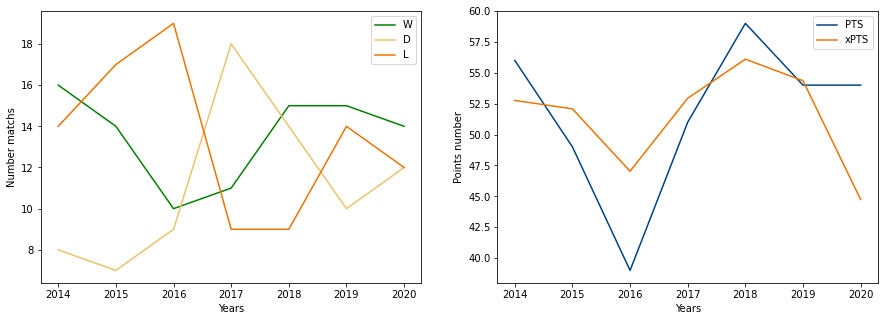

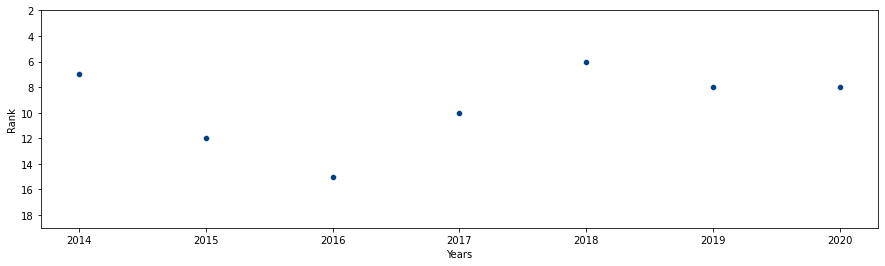

-------------------------------------------------------------------------------------------------------------------


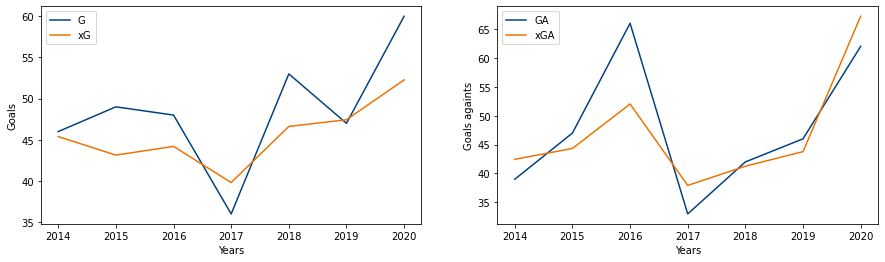

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[15,5])
# plt.plot(list(mtp['Years']), list(mtp['L']), label='L')
print('-'*47,' Résultats de Montpellier ','-'*40)
plt.subplot(121)
sns.lineplot(x="Years",y='W',data=mtp,color='green',label='W')
sns.lineplot(x="Years",y='D',data=mtp,color='#e9c46a',label='D')
sns.lineplot(x="Years",y='L',data=mtp,color='#ED7300',label='L')
plt.ylabel('Number matchs')
plt.subplot(122)
sns.lineplot(x="Years",y='PTS',data=mtp,color='#004184',label='PTS')
sns.lineplot(x="Years",y='xPTS',data=mtp,color='#ED7300',label='xPTS')
plt.ylabel('Points number')
plt.show()
plt.figure(figsize=[15,4])
sns.scatterplot(x="Years",y='Rank',data=mtp,color='#004184')
plt.ylim(19,2)
# for index,row in zip(range(0,len(mtp.index)),mtp['Rank']):
#     print(row)
#     plt.text(index*0.1,,str(row), color='black', ha="center")
plt.show()
print('-'*115)
plt.figure(figsize=[15,4])
plt.subplot(121)
sns.lineplot(x="Years",y='G',data=mtp,color='#004184',label='G')
sns.lineplot(x="Years",y='xG',data=mtp,color='#ED7300',label='xG')
plt.ylabel('Goals')
plt.subplot(122)
sns.lineplot(x="Years",y='GA',data=mtp,color='#004184',label='GA')
sns.lineplot(x="Years",y='xGA',data=mtp,color='#ED7300',label='xGA')
plt.ylabel('Goals againts')
plt.show()

### Player

In [68]:
euro_ligue_corr = ligue_corr[ligue_corr['Rank'] < 6]

In [69]:
euro_ligue_corr['Team'].unique()

array(['Paris Saint Germain', 'Lyon', 'Monaco', 'Marseille',
       'Saint-Etienne', 'Nice', 'Lille', 'Rennes', 'Reims'], dtype=object)

In [21]:
df_mhsc_players_stat = []
for i in year:
    goals = sum(df_player[(df_player['team_title'] == 'Montpellier')&(df_player['year'] == int(i))].sort_values(by='goals',ascending=False).iloc[0:3]['goals'])    
    expect_goals = sum(df_player[(df_player['team_title'] == 'Montpellier')&(df_player['year'] == int(i))].sort_values(by='goals',ascending=False).iloc[0:3]['xG'])
    np = sum(df_player[(df_player['team_title'] == 'Montpellier')&(df_player['year'] == int(i))].sort_values(by='goals',ascending=False).iloc[0:3]['npg'])    
    npG = sum(df_player[(df_player['team_title'] == 'Montpellier')&(df_player['year'] == int(i))].sort_values(by='goals',ascending=False).iloc[0:3]['npxG'])
    red_card = sum(df_player[(df_player['team_title'] == 'Montpellier')&(df_player['year'] == int(i))]['red_cards'])
    yellow_card = sum(df_player[(df_player['team_title'] == 'Montpellier')&(df_player['year'] == int(i))]['yellow_cards'])
    df_mhsc_players_stat.append(pd.DataFrame({'year':[i],'goals':[goals],'expect_goals':[expect_goals],'goals without penalty':[np],'expect goals without penalty':[npG],'red card':[red_card],'yellow card':[yellow_card]}))
stat_mhsc = pd.concat(df_mhsc_players_stat)

In [22]:
import numpy as np

In [23]:
list_goal_pourcent = []
for i,e in zip(stat_mhsc['goals'],mtp['G']):
    #print(e,i)
    list_goal_pourcent.append(np.around(((i/e)*100),decimals=3))

In [24]:
stat_mhsc['Pourcent goal'] = list_goal_pourcent

A faire :

    - pourcentage de goals des 3 meilleurs buteurs sur l'ensemble des buts
    - red/yellow card 
 

In [25]:
stat_mhsc

,year,goals,expect_goals,goals without penalty,expect goals without penalty,red card,yellow card,Pourcent goal
0,2014,26,21.9330,23,18.1325,1,51,56.522
0,2015,19,17.4523,19,17.4523,2,64,38.776
0,2016,30,18.8332,27,16.5529,5,41,62.500
0,2017,22,21.2814,22,20.5213,1,72,61.111
0,2018,23,21.7998,20,19.5197,3,58,43.396
0,2019,21,17.4096,19,14.3692,5,53,44.681
0,2020,40,30.1054,40,29.3453,7,65,66.667


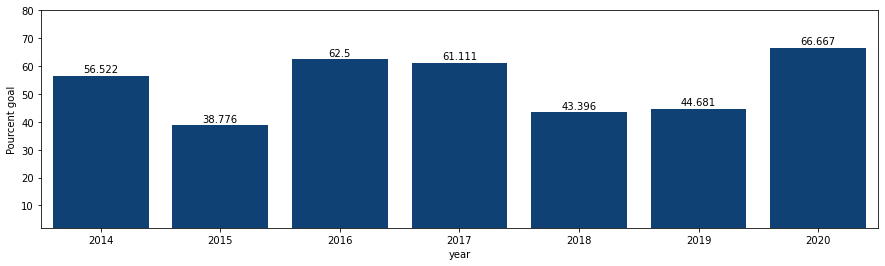

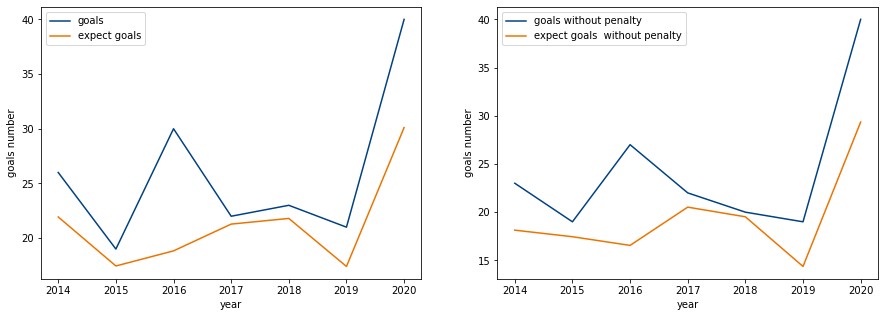

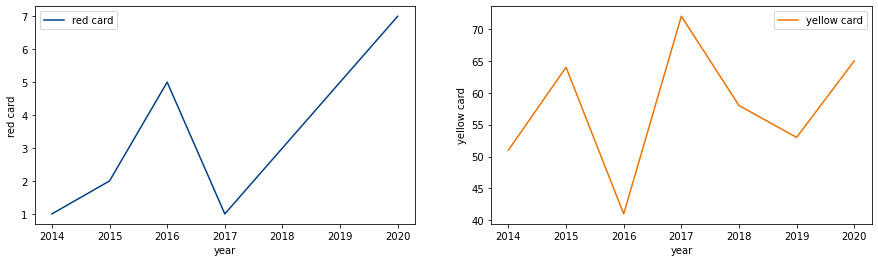

In [26]:
plt.figure(figsize=[15,4])
sns.barplot(x="year",y='Pourcent goal',data=stat_mhsc,color='#004184')
rects = stat_mhsc["year"]
labels = stat_mhsc['Pourcent goal']
for rect, label in zip(range(0,(len(rects))), labels):
    height = label
    plt.text(
        rect, height + 0.5, label, ha="center", va="bottom"
    )
plt.ylim(2,80)
plt.show()
plt.figure(figsize=[15,5])
plt.subplot(121)
sns.lineplot(x="year",y='goals',data=stat_mhsc,color='#004184',label='goals')
sns.lineplot(x="year",y='expect_goals',data=stat_mhsc,color='#ED7300',label='expect goals')
plt.ylabel('goals number')
plt.subplot(122)
sns.lineplot(x="year",y='goals without penalty',data=stat_mhsc,color='#004184',label='goals without penalty')
sns.lineplot(x="year",y='expect goals without penalty',data=stat_mhsc,color='#ED7300',label='expect goals  without penalty')
plt.ylabel('goals number')
plt.show()
plt.figure(figsize=[15,4])
plt.subplot(121)
sns.lineplot(x="year",y='red card',data=stat_mhsc,color='#004184',label='red card')
plt.subplot(122)
sns.lineplot(x="year",y='yellow card',data=stat_mhsc,color='#ED7300',label='yellow card')
plt.show()

# Concurrents

In [27]:
mtp

,Rank,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,Years,xG coef,xGA coef,xPTS coef
6,7,Montpellier,38,16,8,14,46,39,56,45.390,42.450,52.760,2014,1.022,0.929,1.077
31,12,Montpellier,38,14,7,17,49,47,49,43.140,44.330,52.080,2015,1.140,1.068,0.942
54,15,Montpellier,38,10,9,19,48,66,39,44.200,52.030,47.030,2016,1.091,1.269,0.830
69,10,Montpellier,38,11,18,9,36,33,51,39.810,37.930,52.940,2017,0.923,0.892,0.981
85,6,Montpellier,38,15,14,9,53,42,59,46.620,41.260,56.100,2018,1.152,1.024,1.054
107,8,Montpellier,38,15,10,14,47,46,54,47.432,43.781,54.354,2019,1.029,1.062,1.000
127,8,Montpellier,38,14,12,12,60,62,54,52.270,67.220,44.740,2020,1.154,0.925,1.227


In [28]:
euro_ligue_corr = ligue_corr[ligue_corr['Rank'] < 6]

In [29]:
# ligue_corr[ligue_corr['Years'] == 2019]

In [30]:
mtp_point= mtp.set_index('Years')[['PTS','Rank']].T

In [31]:
list(mtp_point.values[0])

[56, 49, 39, 51, 59, 54, 54]

In [32]:
ligue_corr[(ligue_corr['Rank'] > 4)&(ligue_corr['Rank'] < 9)]

,Rank,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,Years,xG coef,xGA coef,xPTS coef
4,5,Saint-Etienne,38,19,12,7,51,30,69,46.490,38.240,58.700,2014,1.109,0.789,1.190
5,6,Bordeaux,38,17,12,9,47,44,63,48.210,43.090,55.790,2014,0.979,1.023,1.145
6,7,Montpellier,38,16,8,14,46,39,56,45.390,42.450,52.760,2014,1.022,0.929,1.077
7,8,Lille,38,16,8,14,43,42,56,40.920,44.220,50.780,2014,1.075,0.955,1.120
24,5,Lille,38,15,15,8,39,27,60,41.690,35.790,55.970,2015,0.951,0.771,1.091
25,6,Saint-Etienne,38,17,7,14,42,37,58,45.460,44.660,53.630,2015,0.933,0.841,1.094
26,7,Caen,38,16,6,16,39,52,54,43.900,49.690,49.480,2015,0.907,1.061,1.102
27,8,Rennes,38,13,13,12,52,54,52,42.910,47.020,49.630,2015,1.238,1.149,1.061
44,5,Marseille,38,17,11,10,57,41,62,53.830,47.330,56.840,2016,1.075,0.872,1.107
45,6,Bordeaux,38,15,14,9,53,43,59,52.020,44.110,58.160,2016,1.019,0.977,1.017


----------------------------  Comparaison du nombre de points entre les clubs européens  ----------------------------
 


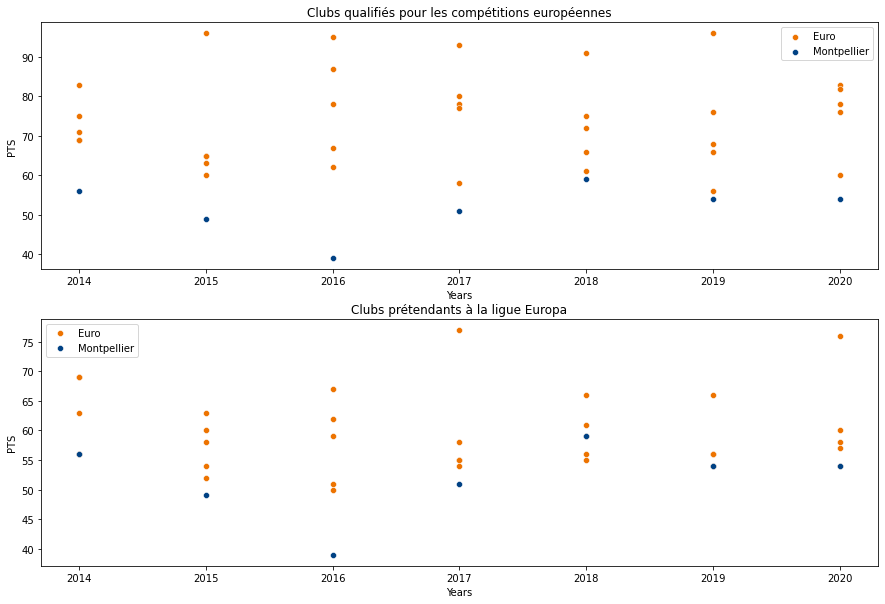

---------------------------------------------------------------------------------------------------------------------


In [33]:
markers = {'Euro':'O','Montpellier':'X'}
plt.figure(figsize=[15,10])
print('-'*28,' Comparaison du nombre de points entre les clubs européens ','-'*28)
print(' ')
plt.subplot(211)
sns.scatterplot(x='Years',y='PTS',data=ligue_corr[ligue_corr['Rank'] < 6],color='#ED7300',label='Euro')
sns.scatterplot(x='Years',y='PTS',data=ligue_corr[ligue_corr['Team'] == 'Montpellier'],color='#004184',label='Montpellier')
plt.title('Clubs qualifiés pour les compétitions européennes')
plt.subplot(212)
sns.scatterplot(x='Years',y='PTS',data=ligue_corr[(ligue_corr['Rank'] > 3)&(ligue_corr['Rank'] < 9)],markers=markers,color='#ED7300',label='Euro')
sns.scatterplot(x='Years',y='PTS',data=ligue_corr[ligue_corr['Team'] == 'Montpellier'],markers='v',color='#004184',label='Montpellier')
plt.title('Clubs prétendants à la ligue Europa')
plt.legend()
plt.show()
print('-'*117)
# print()[].T

In [5]:
label_list = []
for i,e in zip(ligue_corr['Rank'],ligue_corr['Team']):
    if e == 'Montpellier':
        label_list.append('MHSC')
    else:
        if i < 4:
            label_list.append('C1')
        elif (i >= 4)&(i <= 5):
            label_list.append('C3')
        elif (i >= 6)&(i <= 9):
            label_list.append('pre-C3')
        elif i > 8:
            label_list.append('Other')
            
ligue_corr['label'] = label_list

In [100]:
ligue_corr[(ligue_corr['Years'] == 2014)]

,Rank,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,Years,xG coef,xGA coef,xPTS coef,label,dif PTS
0,1,Paris Saint Germain,38,24,11,3,83,36,83,78.42,28.24,84.10,2014,1.064,1.286,0.988,C1,-1.10
1,2,Lyon,38,22,9,7,72,33,75,62.85,41.71,65.62,2014,1.161,0.805,1.154,C1,9.38
2,3,Monaco,38,20,11,7,51,26,71,56.61,37.62,64.81,2014,0.911,0.703,1.109,C1,6.19
3,4,Marseille,38,21,6,11,76,42,69,60.63,36.41,66.51,2014,1.267,1.167,1.045,C3,2.49
4,5,Saint-Etienne,38,19,12,7,51,30,69,46.49,38.24,58.70,2014,1.109,0.789,1.190,C3,10.30
5,6,Bordeaux,38,17,12,9,47,44,63,48.21,43.09,55.79,2014,0.979,1.023,1.145,pre-C3,7.21
6,7,Montpellier,38,16,8,14,46,39,56,45.39,42.45,52.76,2014,1.022,0.929,1.077,MHSC,3.24
7,8,Lille,38,16,8,14,43,42,56,40.92,44.22,50.78,2014,1.075,0.955,1.120,pre-C3,5.22
8,9,Rennes,38,13,11,14,35,42,50,37.44,38.92,49.58,2014,0.946,1.105,1.020,pre-C3,0.42
9,10,Guingamp,38,15,4,19,41,55,49,37.85,45.12,47.48,2014,1.108,1.222,1.043,Other,1.52


<AxesSubplot:xlabel='label', ylabel='PTS'>

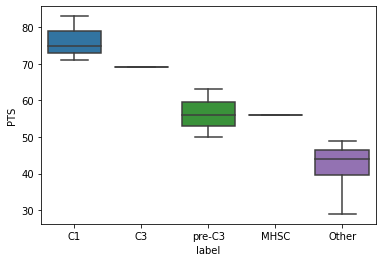

In [6]:
sns.boxplot(x="label",y='PTS',data=ligue_corr[(ligue_corr['Years'] == 2014)])

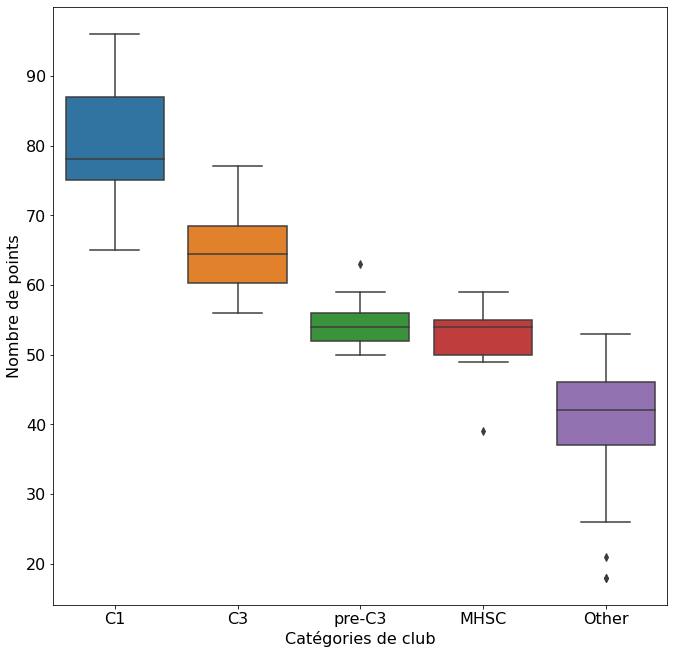

In [17]:
plt.figure(figsize=[11,11])
sns.boxplot(x="label",y='PTS',data=ligue_corr)
plt.xlabel('Catégories de club',fontsize=16)
plt.ylabel('Nombre de points',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Expected points 

In [137]:
mtp_expect_point = mtp.set_index('Years')[['xPTS coef','Rank']].T

In [138]:
# plt.figure(figsize=[15,5])
# sns.boxplot(x='Years',y='xPTS coef',data=euro_ligue_corr,color='#ED7300')  
# rects = year
# labels_point = list(mtp_expect_point.values[0])
# labels_rank = list(mtp_expect_point.values[1])
# plt.text(3,0.58,'Expected Point number and Rank of MHSC',horizontalalignment='center')
# for rect, label1,label2 in zip(range(0,(len(rects))), labels_point,labels_rank):
#     height = label
#     plt.text(rect, 0.7, label1,horizontalalignment='center')
#     plt.text(rect, 0.64, label2,horizontalalignment='center')
# plt.show()
# # print()[].T)
# plt.figure(figsize=[15,5])
# plt.subplot(121)
# sns.boxplot(x="Years",y='xPTS coef',data=euro_ligue_corr[euro_ligue_corr['Rank'] < 4],color='#004184')
# plt.ylabel('Expected Points number')
# plt.title('Champions ligue')
# plt.subplot(122)
# sns.boxplot(x="Years",y='xPTS coef',data=euro_ligue_corr[(euro_ligue_corr['Rank'] > 4)&(euro_ligue_corr['Rank'] < 8)],color='#004184')
# plt.ylabel('Expected Points number')
# plt.title('Europa ligue')
# plt.show()

In [70]:
ligue_corr['dif PTS'] = ligue_corr['PTS'] - ligue_corr['xPTS']

In [140]:
ligue_corr_group = np.around(ligue_corr.groupby(['Years','label']).mean().reset_index(),decimals=1)

In [141]:
# ligue_corr_group

In [142]:
ligue_corr_group.pivot(index='Years',columns='label',values=('dif PTS'))

label,C1,C3,MHSC,Other,pre-C3
Years,,,,,
2014,4.8,6.4,3.2,-2.7,4.3
2015,2.6,7.5,-3.1,-4.4,3.8
2016,13.8,1.5,-8.0,-3.4,-0.3
2017,10.4,2.4,-1.9,-3.4,-1.1
2018,5.2,6.4,2.9,-5.7,5.9
2019,11.7,1.6,-0.4,-2.9,-1.6
2020,7.1,1.0,9.3,-3.4,0.4


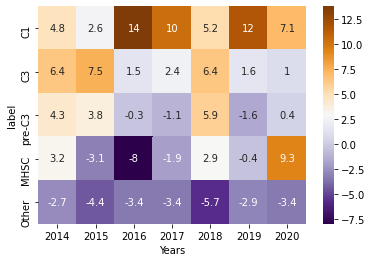

In [143]:
# Create an array with the colors you want to use
colors = ['#ED7300', '#004184']
# Set your custom color palette
customPalette = sns.set_palette(colors)
res = sns.heatmap(ligue_corr_group.pivot(index='label',columns='Years',values=('dif PTS')).reindex(['C1','C3','pre-C3','MHSC','Other']),annot=True,cmap='PuOr_r')
for t in res.texts: t.set_text(t.get_text())
    
plt.show()

# Valeurs marchandes

In [46]:
df_euro

,Positions,Âge,Valeur marchande (millions),Valeur marchande moyenne (millions),Years,Crew
0,Gardien,"25,00","20,90","5,23",2014,paris saint germain
1,Défense,"25,70","113,50","11,35",2014,paris saint germain
2,Milieu de terrain,"23,30","122,50","12,25",2014,paris saint germain
3,Attaquant,"23,25","107,00","13,38",2014,paris saint germain
4,Total,"24,25","363,90","11,37",2014,paris saint germain
...,...,...,...,...,...,...
955,Gardien,NaN,-,-,2016,thonon evian grand geneve
956,Défense,NaN,-,-,2016,thonon evian grand geneve
957,Milieu de terrain,NaN,-,-,2016,thonon evian grand geneve
958,Attaquant,"24,00","1,50","1,50",2016,thonon evian grand geneve


In [47]:
for e,a,u in zip(df_euro['Valeur marchande (millions)'],df_euro['Crew'],df_euro['Positions']):
    if 'K' in e:
        print(e,a,u)

900 K € sm caen Gardien
850 K € nimes olympique Gardien
900 K € as nancy lorraine Gardien
850 K € rc lens Gardien
800 K € rc lens Gardien
550 K € amiens sc Gardien
700 K € amiens sc Défense
750 K € amiens sc Milieu de terrain
250 K € amiens sc Gardien
900 K € amiens sc Milieu de terrain
950 K € amiens sc Attaquant
575 K € sc bastia Gardien
950 K € sc bastia Défense
550 K € sc bastia Attaquant
75 K € sc bastia Gardien
275 K € sc bastia Attaquant
325 K € sc bastia Gardien
950 K € sc bastia Défense
375 K € sc bastia Attaquant
550 K € sc bastia Gardien
250 K € rc strassburg alsace Gardien
850 K € rc strassburg alsace Défense
650 K € rc strassburg alsace Gardien
600 K € rc strassburg alsace Défense
800 K € rc strassburg alsace Milieu de terrain
900 K € stade brest 29 Gardien


In [48]:
df_euro.dropna(axis=0,inplace=True)

In [49]:
df_value_1 = []
df_value_2 = []
for i,e in zip(df_euro['Valeur marchande (millions)'],df_euro['Valeur marchande moyenne (millions)']):
    if ('K' in e)&('K' in i):
        df_value_1.append(float(i.split(' ')[0])/1000)
        df_value_2.append(float(e.split(' ')[0])/1000)
    elif 'K' in e:
        df_value_1.append(float(i.replace(',','.')))
        df_value_2.append(float(e.split(' ')[0])/1000)
    elif 'K' in i:
        df_value_1.append(float(i.split(' ')[0])/1000)
        df_value_2.append(float(e.replace(',','.')))
    else:
        df_value_1.append(i.replace(',','.'))
        df_value_2.append(i.replace(',','.'))

In [50]:
df_euro['Valeur marchande (millions)'] = df_value_1
df_euro['Valeur marchande moyenne (millions)'] = df_value_2

In [51]:
df_euro['Âge'] = [i.replace(',','.') for i in df_euro['Âge']] 
# df_euro['Valeur marchande (millions)'] = [i.replace(',','.') for i in df_euro['Valeur marchande (millions)']] 
# df_euro['Valeur marchande moyenne (millions)'] = [i.replace(',','.') for i in df_euro['Valeur marchande moyenne (millions)']] 
# df_euro['Valeur marchande moyenne (millions)'] = [i.split(' ')[0] for i in df_euro['Valeur marchande moyenne (millions)']] 
# df_euro['Valeur marchande (millions)'] = [i.split(' ')[0] for i in df_euro['Valeur marchande (millions)']] 

In [52]:
column = ['Âge', 'Valeur marchande (millions)',
       'Valeur marchande moyenne (millions)']
for i in column:
    df_euro[i] = df_euro[i].astype(float)

In [53]:
mtp_max = value_max[value_max['Crew'] == 'montpellier-hsc']

In [54]:
total = df_euro[(df_euro['Crew'] == 'montpellier hsc')&(df_euro['Positions'] == 'Total')]

In [55]:
# print(df_euro['Crew'].unique())
# print(euro_ligue_corr['Team'].unique())

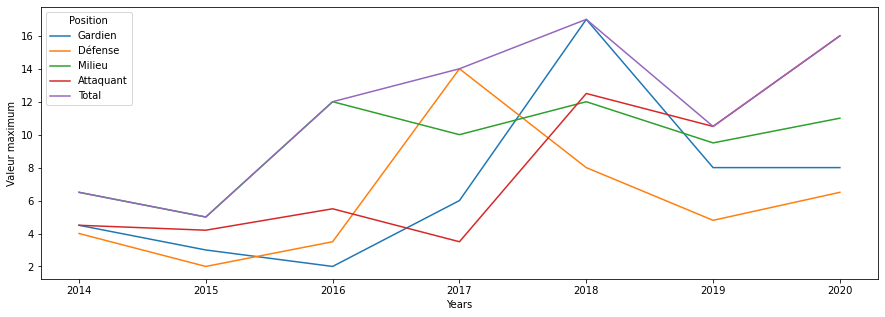

In [56]:
plt.figure(figsize=[15,5])
sns.lineplot(x='Years',y='Valeur maximum',hue='Position',data=mtp_max)

plt.show()

In [57]:
# ligue_corr['Team'].unique()

In [58]:
# list(df_euro['Team'].unique()[10:])

In [71]:
print(ligue_corr['Team'].unique())
print(df_euro['Crew'].unique())

['Paris Saint Germain' 'Lyon' 'Monaco' 'Marseille' 'Saint-Etienne'
 'Bordeaux' 'Montpellier' 'Lille' 'Rennes' 'Guingamp' 'Nice' 'SC Bastia'
 'Caen' 'Nantes' 'Reims' 'Lorient' 'Toulouse' 'Evian Thonon Gaillard'
 'Metz' 'Lens' 'Angers' 'GFC Ajaccio' 'Troyes' 'Dijon' 'Nancy' 'Amiens'
 'Strasbourg' 'Nimes' 'Brest']
['Paris Saint Germain' 'Lyon' 'Monaco' 'Lille' 'Marseille' 'Saint-Etienne'
 'Nice' 'Reims' 'Rennes' 'Montpellier' 'Bordeaux' 'Guingamp' 'Caen'
 'Toulouse' 'Dijon' 'Nimes' 'Nancy' 'Metz' 'Nantes' 'Lens' 'Amiens'
 'SC Bastia' 'Strasbourg' 'Brest' 'Lorient' 'Angers' 'Troyes'
 'Evian Thonon Gaillard']


In [72]:
df_euro['Crew'] = [i.replace(' paris saint germain','Paris Saint Germain') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('olympique lyon','Lyon') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('as monaco','Monaco') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('losc lille','Lille') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('olympique marseille','Marseille') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('as saint etienne','Saint-Etienne') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('ogc nizza','Nice') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('stade reims','Reims') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('montpellier hsc','Montpellier') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('ea guingamp','Guingamp') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('sm caen','Caen') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace(' toulouse','Toulouse') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('dijon o','Dijon') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('nimes olympique','Nimes') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('as nancy lorraine','Nancy') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace(' metz','Metz') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace(' nantes','Nantes') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('rc lens','Lens') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('amiens sc','Amiens') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('sc bastia','SC Bastia') for i in df_euro['Crew']] 
df_euro['Crew'] = [i.replace('rc strassburg alsace','Strasbourg') for i in df_euro['Crew']]
df_euro['Crew'] = [i.replace('stade brest 29','Brest') for i in df_euro['Crew']]
df_euro['Crew'] = [i.replace(' lorient','Lorient') for i in df_euro['Crew']]
df_euro['Crew'] = [i.replace('sco angers','Angers') for i in df_euro['Crew']]
df_euro['Crew'] = [i.replace('es troyes ac','Troyes') for i in df_euro['Crew']]
df_euro['Crew'] = [i.replace('thonon evian grand geneve ','Evian Thonon Gaillard') for i in df_euro['Crew']]
df_euro['Crew'] = [i.replace(' girondins bordeaux','Bordeaux') for i in df_euro['Crew']]
df_euro['Crew'] = [i.replace(' stade rennes','Rennes') for i in df_euro['Crew']]
# df_euro['Team'] = [i.replace('sc bastia','SC Bastia') for i in df_euro['Team']] 
# df_euro['Team'] = [i.replace('Evian-Thonon-Gaillard','Evian Thonon-Gaillard') for i in df_euro['Team']]

In [73]:
df_euro.rename(columns={'Crew':'Team'},inplace=True)

In [74]:
for i,h in zip(df_euro['Team'].unique(),ligue_corr['Team'].unique()):
#     print(i,h)
    if (i not in df_euro['Team'].unique())|(i not in ligue_corr['Team'].unique()):
        print(i,'i')
    elif (h not in ligue_corr['Team'].unique())|(h not in df_euro['Team'].unique()):
        print(h,'k')

GFC Ajaccio k


In [101]:
df_lig_val = ligue_corr.merge(df_euro,how='inner',on=['Team','Years'])

In [102]:
df_lig_val['Team'].unique()

array(['Paris Saint Germain', 'Lyon', 'Monaco', 'Marseille',
       'Saint-Etienne', 'Bordeaux', 'Montpellier', 'Lille', 'Rennes',
       'Guingamp', 'Nice', 'SC Bastia', 'Caen', 'Nantes', 'Reims',
       'Lorient', 'Toulouse', 'Evian Thonon Gaillard', 'Metz', 'Lens',
       'Angers', 'Troyes', 'Dijon', 'Nancy', 'Amiens', 'Strasbourg',
       'Nimes', 'Brest'], dtype=object)

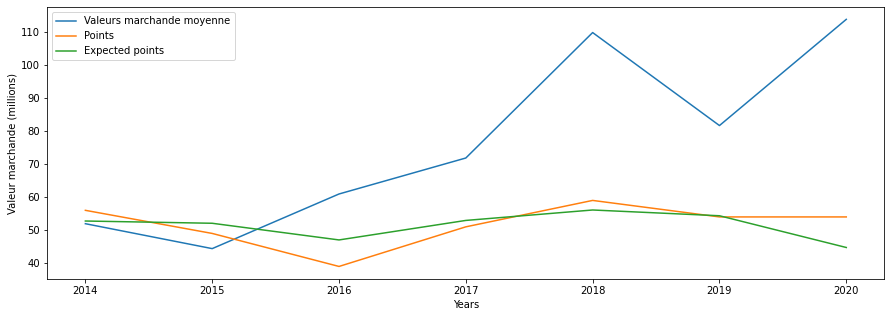

In [103]:
plt.figure(figsize=[15,5])
sns.lineplot(x='Years',y='Valeur marchande (millions)',data=total,label='Valeurs marchande moyenne')
sns.lineplot(x='Years',y='PTS',data=mtp,label='Points')
sns.lineplot(x='Years',y='xPTS',data=mtp,label='Expected points')
# rects = year
# labels_rank = list(mtp['Rank'])
# plt.text(3,0.32,'Point number and Rank of MHSC',horizontalalignment='center')
# for rect, label in zip(range(0,len(rects)), labels_rank):
#     plt.text(rect, 0.36, label,horizontalalignment='center')
plt.show()

### Corrélation valeurs marchande / résultats 

In [78]:
df_lig_val

,Rank,Team,M,W,D,L,G,GA,PTS,xG,...,xPTS,Years,xG coef,xGA coef,xPTS coef,dif PTS,Positions,Âge,Valeur marchande (millions),Valeur marchande moyenne (millions)
0,1,Paris Saint Germain,38,24,11,3,83,36,83,78.42,...,84.10,2014,1.064,1.286,0.988,-1.10,Gardien,25.00,20.90,20.90
1,1,Paris Saint Germain,38,24,11,3,83,36,83,78.42,...,84.10,2014,1.064,1.286,0.988,-1.10,Défense,25.70,113.50,113.50
2,1,Paris Saint Germain,38,24,11,3,83,36,83,78.42,...,84.10,2014,1.064,1.286,0.988,-1.10,Milieu de terrain,23.30,122.50,122.50
3,1,Paris Saint Germain,38,24,11,3,83,36,83,78.42,...,84.10,2014,1.064,1.286,0.988,-1.10,Attaquant,23.25,107.00,107.00
4,1,Paris Saint Germain,38,24,11,3,83,36,83,78.42,...,84.10,2014,1.064,1.286,0.988,-1.10,Total,24.25,363.90,363.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,20,Dijon,38,4,9,25,25,73,21,31.85,...,24.88,2020,0.806,0.961,0.875,-3.88,Gardien,23.40,11.50,11.50
691,20,Dijon,38,4,9,25,25,73,21,31.85,...,24.88,2020,0.806,0.961,0.875,-3.88,Défense,24.09,14.98,14.98
692,20,Dijon,38,4,9,25,25,73,21,31.85,...,24.88,2020,0.806,0.961,0.875,-3.88,Milieu de terrain,24.78,12.55,12.55
693,20,Dijon,38,4,9,25,25,73,21,31.85,...,24.88,2020,0.806,0.961,0.875,-3.88,Attaquant,21.50,26.60,26.60


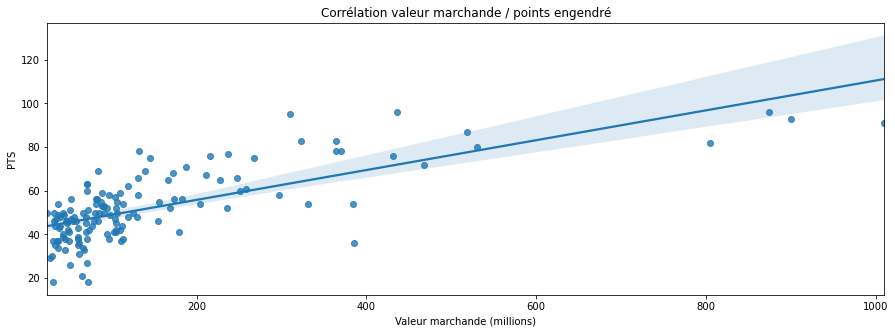

Covariance empirique :  1933.73377620206
Coefficient de Pearson :  0.7206253129806909

Les valeurs suivent une distribution linéaire


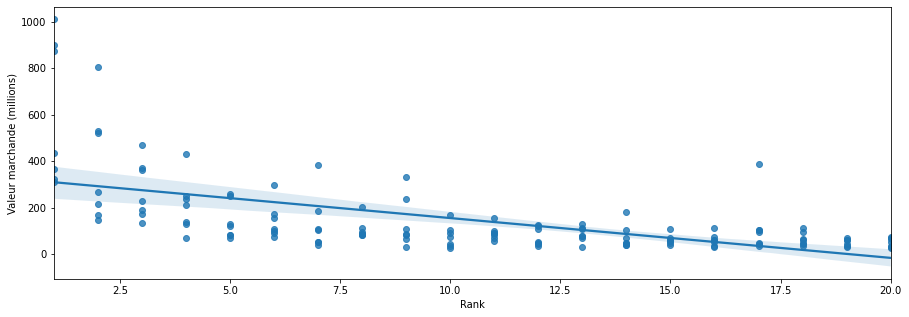

Covariance empirique :  -565.2217317944204
Coefficient de Pearson :  -0.5852378419261083

Les valeurs suivent une distribution linéaire


In [79]:
plt.figure(figsize=[15,5])
sns.regplot(x='Valeur marchande (millions)',y='PTS',data=df_lig_val[df_lig_val['Positions'] == 'Total'])
plt.title('Corrélation valeur marchande / points engendré')
plt.show()
corré_quant(df_lig_val[df_lig_val['Positions'] == 'Total']["Valeur marchande (millions)"],df_lig_val[df_lig_val['Positions'] == 'Total']["PTS"])
plt.figure(figsize=[15,5])
sns.regplot(x='Rank',y='Valeur marchande (millions)',data=df_lig_val[df_lig_val['Positions'] == 'Total'])
plt.show()
corré_quant(df_lig_val[df_lig_val['Positions'] == 'Total']['Rank'],df_lig_val[df_lig_val['Positions'] == 'Total']['Valeur marchande (millions)'])


### Corrélation valeurs marchande / buts marqués - encaissés

In [80]:
df_lig_val[(df_lig_val['G'] > 50)&(df_lig_val['Positions'] == 'Attaquant')]

,Rank,Team,M,W,D,L,G,GA,PTS,xG,...,xPTS,Years,xG coef,xGA coef,xPTS coef,dif PTS,Positions,Âge,Valeur marchande (millions),Valeur marchande moyenne (millions)
3,1,Paris Saint Germain,38,24,11,3,83,36,83,78.420,...,84.100,2014,1.064,1.286,0.988,-1.100,Attaquant,23.25,107.00,107.00
8,2,Lyon,38,22,9,7,72,33,75,62.850,...,65.620,2014,1.161,0.805,1.154,9.380,Attaquant,23.40,39.25,39.25
13,3,Monaco,38,20,11,7,51,26,71,56.610,...,64.810,2014,0.911,0.703,1.109,6.190,Attaquant,23.45,82.75,82.75
18,4,Marseille,38,21,6,11,76,42,69,60.630,...,66.510,2014,1.267,1.167,1.045,2.490,Attaquant,21.45,68.20,68.20
23,5,Saint-Etienne,38,19,12,7,51,30,69,46.490,...,58.700,2014,1.109,0.789,1.190,10.300,Attaquant,23.00,25.65,25.65
63,13,Caen,38,12,10,16,54,55,46,41.400,...,40.980,2014,1.317,0.932,1.150,5.020,Attaquant,23.88,13.50,13.50
103,1,Paris Saint Germain,38,30,6,2,102,19,96,86.200,...,90.270,2015,1.186,0.792,1.067,5.730,Attaquant,23.60,160.50,160.50
108,2,Lyon,38,19,8,11,67,43,65,63.010,...,68.690,2015,1.063,1.132,0.956,-3.690,Attaquant,22.40,38.25,38.25
113,3,Monaco,38,17,14,7,57,50,65,58.130,...,59.390,2015,0.983,1.042,1.102,5.610,Attaquant,21.69,88.30,88.30
118,4,Nice,38,18,9,11,58,41,63,45.230,...,51.990,2015,1.289,0.872,1.235,11.010,Attaquant,20.80,15.20,15.20


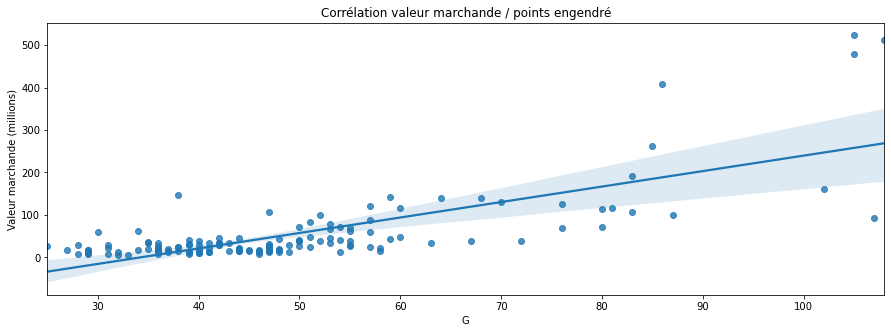

Covariance empirique :  1081.3352160861243
Coefficient de Pearson :  0.7433553547190854

Les valeurs suivent une distribution linéaire


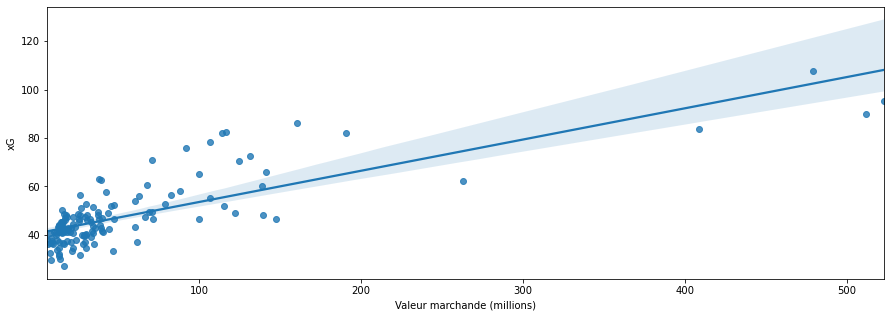

Covariance empirique :  920.2768206842295
Coefficient de Pearson :  0.7900554706524872

Les valeurs suivent une distribution linéaire


In [81]:
# buts marqués
plt.figure(figsize=[15,5])
sns.regplot(x='G',y='Valeur marchande (millions)',data=df_lig_val[df_lig_val['Positions'] == 'Attaquant'])
plt.title('Corrélation valeur marchande / points engendré')
plt.show()
corré_quant(df_lig_val[df_lig_val['Positions'] == 'Attaquant']["G"],df_lig_val[df_lig_val['Positions'] == 'Attaquant']["Valeur marchande (millions)"])
plt.figure(figsize=[15,5])
sns.regplot(x='Valeur marchande (millions)',y='xG',data=df_lig_val[df_lig_val['Positions'] == 'Attaquant'])
plt.show()
corré_quant(df_lig_val[df_lig_val['Positions'] == 'Attaquant']['Valeur marchande (millions)'],df_lig_val[df_lig_val['Positions'] == 'Attaquant']['xG'])


In [82]:
df_lig_val[df_lig_val['Positions'] == 'Gardien']

,Rank,Team,M,W,D,L,G,GA,PTS,xG,...,xPTS,Years,xG coef,xGA coef,xPTS coef,dif PTS,Positions,Âge,Valeur marchande (millions),Valeur marchande moyenne (millions)
0,1,Paris Saint Germain,38,24,11,3,83,36,83,78.42,...,84.10,2014,1.064,1.286,0.988,-1.10,Gardien,25.00,20.90,20.900
5,2,Lyon,38,22,9,7,72,33,75,62.85,...,65.62,2014,1.161,0.805,1.154,9.38,Gardien,23.00,10.40,10.400
10,3,Monaco,38,20,11,7,51,26,71,56.61,...,64.81,2014,0.911,0.703,1.109,6.19,Gardien,24.50,7.30,7.300
15,4,Marseille,38,21,6,11,76,42,69,60.63,...,66.51,2014,1.267,1.167,1.045,2.49,Gardien,23.00,10.75,10.750
20,5,Saint-Etienne,38,19,12,7,51,30,69,46.49,...,58.70,2014,1.109,0.789,1.190,10.30,Gardien,25.33,10.40,10.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,16,Lorient,38,11,9,18,50,68,42,48.15,...,50.28,2020,1.042,1.308,0.840,-8.28,Gardien,25.25,2.70,0.675
675,17,Brest,38,11,8,19,50,66,41,45.77,...,43.95,2020,1.111,1.138,0.953,-2.95,Gardien,23.33,7.80,7.800
680,18,Nantes,38,9,13,16,47,55,40,48.27,...,48.75,2020,0.979,1.019,0.833,-8.75,Gardien,24.67,10.40,10.400
685,19,Nimes,38,9,8,21,40,71,35,41.39,...,39.70,2020,0.976,1.109,0.897,-4.70,Gardien,22.67,2.80,0.933


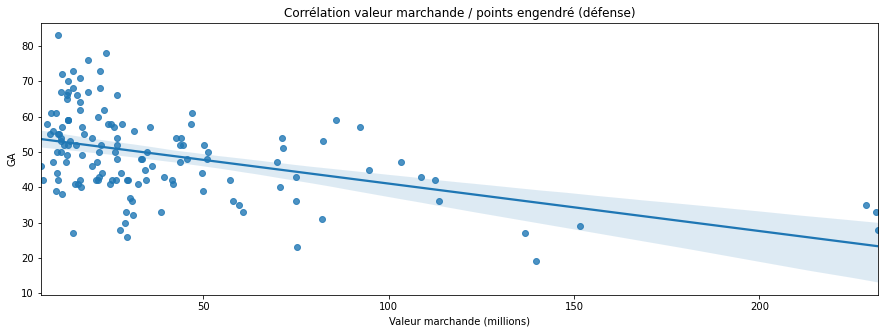

Covariance empirique :  -219.54392370995294
Coefficient de Pearson :  -0.4501239537966395

Les valeurs suivent une distribution linéaire


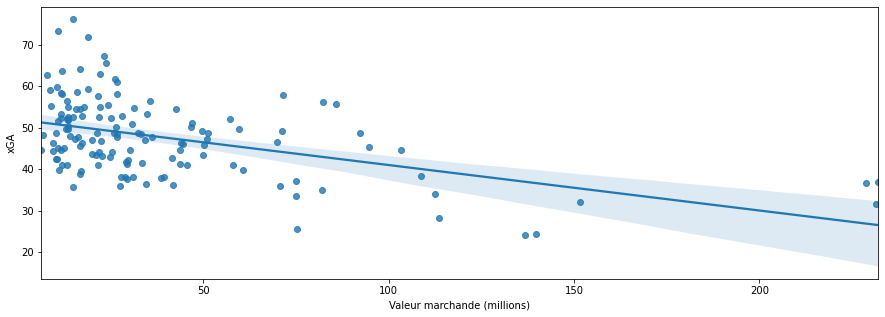

Covariance empirique :  -179.04262086796754
Coefficient de Pearson :  -0.47735031569489894

Les valeurs suivent une distribution linéaire


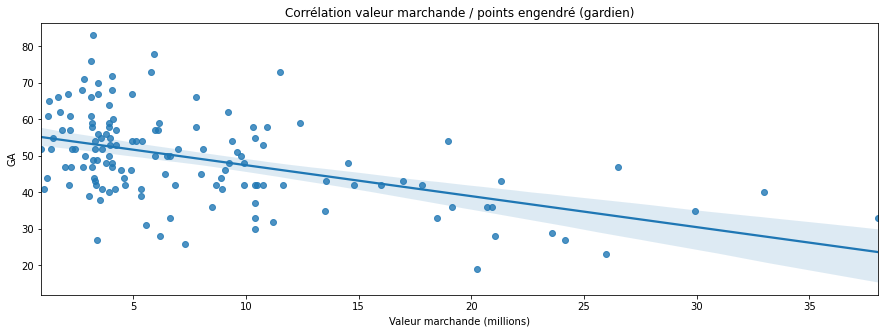

Covariance empirique :  -40.424491485947954
Coefficient de Pearson :  -0.48519759911212146

Les valeurs suivent une distribution linéaire


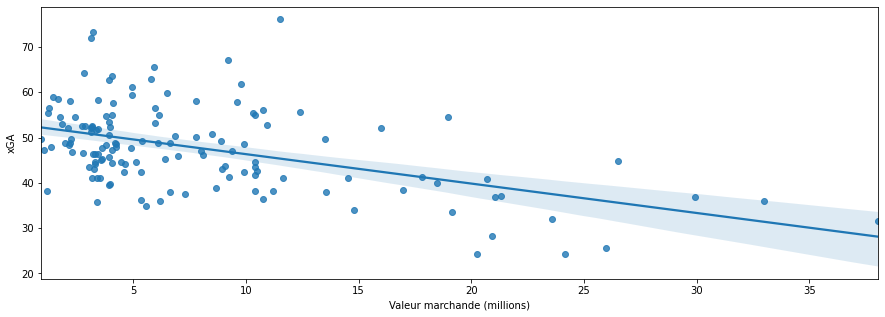

Covariance empirique :  -30.984690665597
Coefficient de Pearson :  -0.48360560620253196

Les valeurs suivent une distribution linéaire


In [83]:
# buts encaissé
#défense
plt.figure(figsize=[15,5])
sns.regplot(x='Valeur marchande (millions)',y='GA',data=df_lig_val[df_lig_val['Positions'] == 'Défense'])
plt.title('Corrélation valeur marchande / points engendré (défense)')
plt.show()
corré_quant(df_lig_val[df_lig_val['Positions'] == 'Défense']["Valeur marchande (millions)"],df_lig_val[df_lig_val['Positions'] == 'Défense']["GA"])
plt.figure(figsize=[15,5])
sns.regplot(x='Valeur marchande (millions)',y='xGA',data=df_lig_val[df_lig_val['Positions'] == 'Défense'])
plt.show()
corré_quant(df_lig_val[df_lig_val['Positions'] == 'Défense']['xGA'],df_lig_val[df_lig_val['Positions'] == 'Défense']['Valeur marchande (millions)'])
#gardien
plt.figure(figsize=[15,5])
sns.regplot(x='Valeur marchande (millions)',y='GA',data=df_lig_val[df_lig_val['Positions'] == 'Gardien'])
plt.title('Corrélation valeur marchande / points engendré (gardien)')
plt.show()
corré_quant(df_lig_val[df_lig_val['Positions'] == 'Gardien']["Valeur marchande (millions)"],df_lig_val[df_lig_val['Positions'] == 'Gardien']["GA"])
plt.figure(figsize=[15,5])
sns.regplot(x='Valeur marchande (millions)',y='xGA',data=df_lig_val[df_lig_val['Positions'] == 'Gardien'])
plt.show()
corré_quant(df_lig_val[df_lig_val['Positions'] == 'Gardien']['xGA'],df_lig_val[df_lig_val['Positions'] == 'Gardien']['Valeur marchande (millions)'])


In [162]:
df_lig_val['win_rate'] = np.around(df_lig_val['W']/df_lig_val['M'],decimals=3)

In [85]:
df_lig_val['lose_rate'] = np.around(df_lig_val['L']/df_lig_val['M'],decimals=3)
df_lig_val['unwin_rate'] = np.around((df_lig_val['L']+df_lig_val['D'])/df_lig_val['M'],decimals=3)

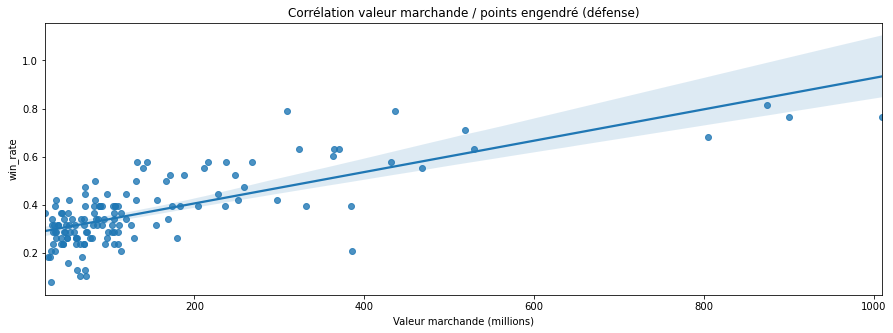

Covariance empirique :  18.402533617307597
Coefficient de Pearson :  0.7420628193086665

Les valeurs suivent une distribution linéaire


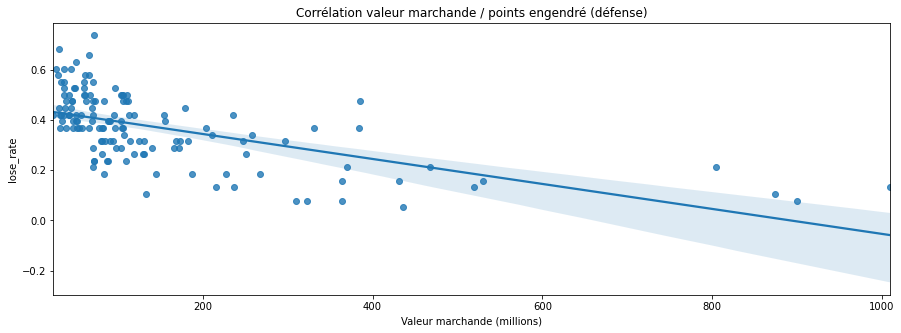

Covariance empirique :  -14.072945429843179
Coefficient de Pearson :  -0.5979462414101804

Les valeurs suivent une distribution linéaire


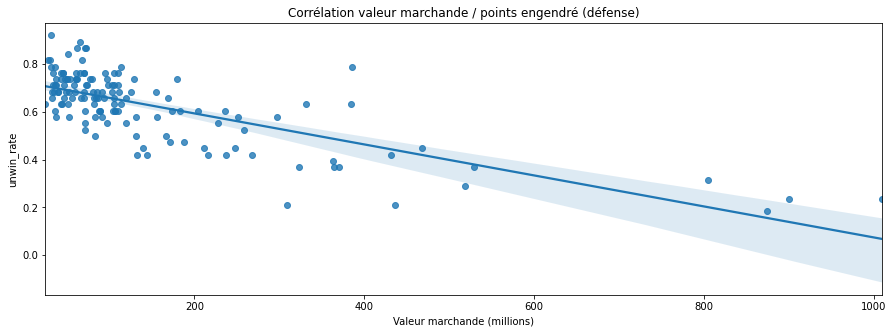

Covariance empirique :  -18.376288795610996
Coefficient de Pearson :  -0.7401997013370181

Les valeurs suivent une distribution linéaire


In [86]:
plt.figure(figsize=[15,5])
sns.regplot(x='Valeur marchande (millions)',y='win_rate',data=df_lig_val[df_lig_val['Positions'] == 'Total'])
plt.title('Corrélation valeur marchande / points engendré (défense)')
plt.show()
corré_quant(df_lig_val[df_lig_val['Positions'] == 'Total']["Valeur marchande (millions)"],df_lig_val[df_lig_val['Positions'] == 'Total']["win_rate"])
plt.figure(figsize=[15,5])
sns.regplot(x='Valeur marchande (millions)',y='lose_rate',data=df_lig_val[df_lig_val['Positions'] == 'Total'])
plt.title('Corrélation valeur marchande / points engendré (défense)')
plt.show()
corré_quant(df_lig_val[df_lig_val['Positions'] == 'Total']["Valeur marchande (millions)"],df_lig_val[df_lig_val['Positions'] == 'Total']["lose_rate"])
plt.figure(figsize=[15,5])
sns.regplot(x='Valeur marchande (millions)',y='unwin_rate',data=df_lig_val[df_lig_val['Positions'] == 'Total'])
plt.title('Corrélation valeur marchande / points engendré (défense)')
plt.show()
corré_quant(df_lig_val[df_lig_val['Positions'] == 'Total']["Valeur marchande (millions)"],df_lig_val[df_lig_val['Positions'] == 'Total']["unwin_rate"])

In [104]:
df_lig_val.columns

Index(['Rank', 'Team', 'M', 'W', 'D', 'L', 'G', 'GA', 'PTS', 'xG', 'xGA',
       'xPTS', 'Years', 'xG coef', 'xGA coef', 'xPTS coef', 'dif PTS', 'label',
       'Positions', 'Âge', 'Valeur marchande (millions)',
       'Valeur marchande moyenne (millions)'],
      dtype='object')

In [105]:
df_lig_val_lab = df_lig_val[(df_lig_val['Positions'] == 'Total')].groupby(['label','Years']).mean().reset_index()

In [106]:
df_lig_val['dif G'] = np.around(df_lig_val['G']/df_lig_val['xG'],decimals=3)
df_lig_val['dif GA'] = np.around(df_lig_val['GA']/df_lig_val['xGA'],decimals=3)

In [165]:
df_lig_val.to_csv('df_lig_val.csv',index=False)

In [18]:
df_lig_val_af = pd.read_csv('df_lig_val.csv',sep=',')

In [167]:
df_lig_val.columns

Index(['Rank', 'Team', 'M', 'W', 'D', 'L', 'G', 'GA', 'PTS', 'xG', 'xGA',
       'xPTS', 'Years', 'xG coef', 'xGA coef', 'xPTS coef', 'dif PTS', 'label',
       'Positions', 'Âge', 'Valeur marchande (millions)',
       'Valeur marchande moyenne (millions)', 'dif G', 'dif GA', 'win_rate'],
      dtype='object')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


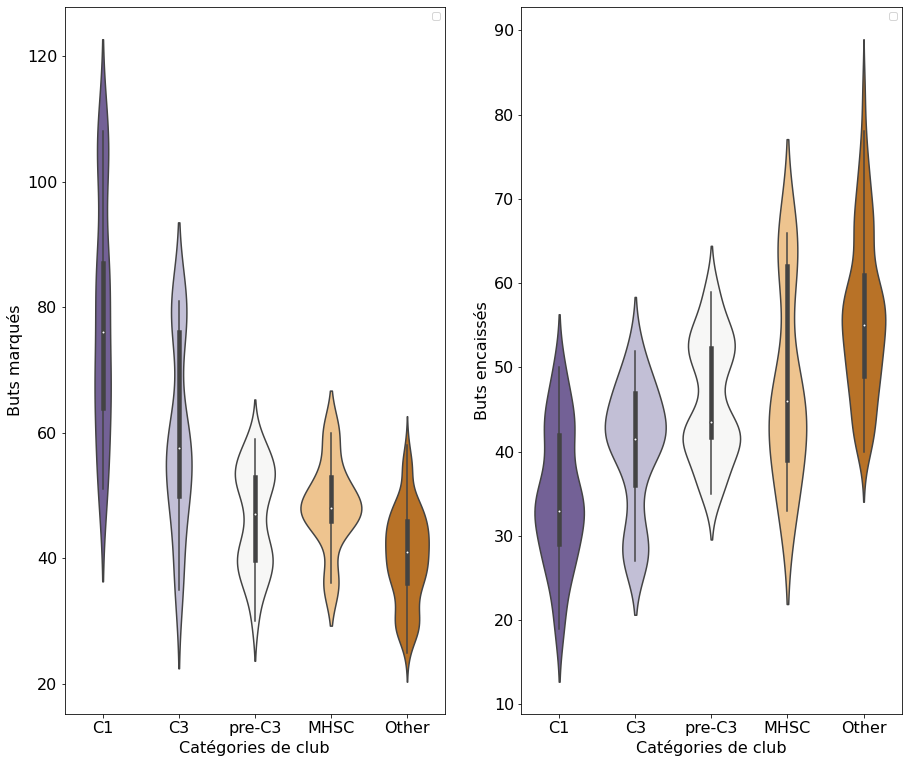

In [34]:
# df_lig_val
plt.figure(figsize=[15,13])
plt.subplot(121)
sns.violinplot(x="label", y="G", data=df_lig_val_af,palette='PuOr_r')
plt.xlabel('Catégories de club',fontsize=16)
plt.ylabel('Buts marqués',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()

plt.subplot(122)
sns.violinplot(x="label", y="GA", data=df_lig_val_af,palette='PuOr_r')
plt.xlabel('Catégories de club',fontsize=16)
plt.ylabel('Buts encaissés',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

In [18]:
x = np.array([30,35, 50, 54, 57,60,70,90,110])
y = np.array([24,29, 45, 48, 51,53,58,63,68])
x_other = np.array([15,50, 57, 60, 62,64])
y_other = np.array([30,30, 35, 40, 60,85])

In [42]:
df_lig_val_af[((df_lig_val_af['label'] != 'C3')|(df_lig_val_af['label'] != 'C1'))&(df_lig_val_af['Positions'] == 'Total')&(df_lig_val_af['GA'] < 40)&(df_lig_val_af['G'] < 65)]

,Rank,Team,M,W,D,L,G,GA,PTS,xG,...,dif PTS,Positions,Âge,Valeur marchande (millions),Valeur marchande moyenne (millions),win_rate,lose_rate,unwin_rate,dif G,dif GA
14,3,Monaco,38,20,11,7,51,26,71,56.610,...,6.190,Total,23.09,187.70,187.700,0.526,0.184,0.474,0.901,0.691
24,5,Saint-Etienne,38,19,12,7,51,30,69,46.490,...,10.300,Total,24.42,83.35,83.350,0.500,0.184,0.500,1.097,0.785
34,7,Montpellier,38,16,8,14,46,39,56,45.390,...,3.240,Total,24.19,51.95,51.950,0.421,0.368,0.579,1.013,0.919
124,5,Lille,38,15,15,8,39,27,60,41.690,...,4.030,Total,24.50,70.80,70.800,0.395,0.211,0.605,0.935,0.754
129,6,Saint-Etienne,38,17,7,14,42,37,58,45.460,...,4.370,Total,24.05,97.20,97.200,0.447,0.368,0.553,0.924,0.828
144,9,Angers,38,13,11,14,40,38,50,36.580,...,3.850,Total,26.29,32.35,0.951,0.342,0.368,0.658,1.093,0.926
209,3,Nice,38,22,12,4,63,36,78,51.540,...,24.530,Total,22.49,132.80,132.800,0.579,0.105,0.421,1.222,0.707
344,10,Montpellier,38,11,18,9,36,33,51,39.810,...,-1.940,Total,24.43,71.85,71.850,0.289,0.237,0.711,0.904,0.870
429,7,Nice,38,15,11,12,30,35,56,43.450,...,7.840,Total,21.74,183.20,183.200,0.395,0.316,0.605,0.690,0.704
504,2,Marseille,38,22,11,5,55,39,76,49.427,...,19.366,Total,23.29,216.15,216.150,0.579,0.132,0.421,1.113,0.897


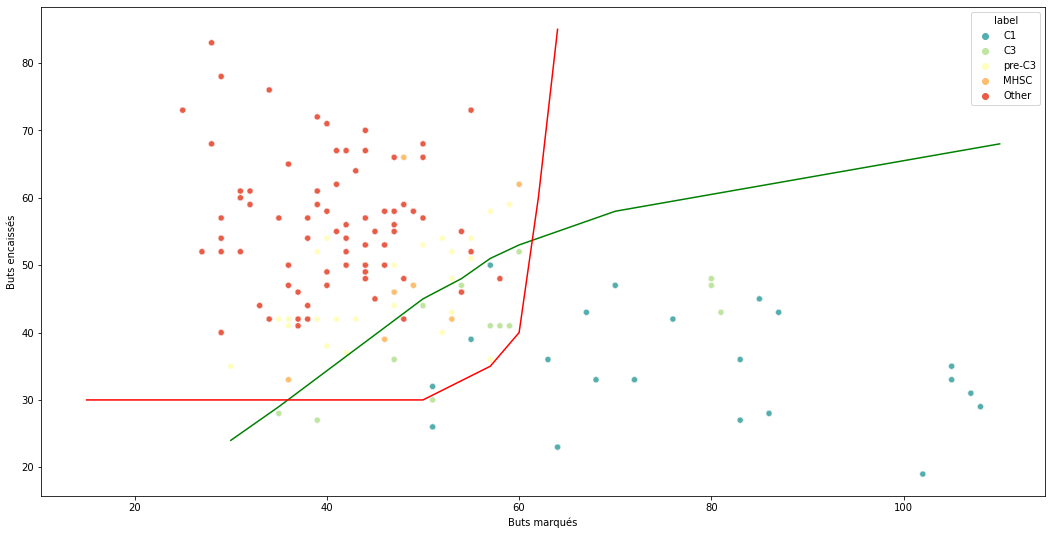

In [43]:
plt.figure(figsize=[18,9])
sns.scatterplot(x="G", y="GA", hue="label",palette='Spectral_r',data=df_lig_val_af)
# sns.displot(x="G", y="GA", hue="label",palette='Paired',kind='kde',data=df_lig_val_af)
plt.ylabel('Buts encaissés')
plt.xlabel('Buts marqués')
plt.plot(x, y,color='green')
plt.plot(x_other, y_other,color='red')
plt.show()

In [194]:
df_lig_val_af[(df_lig_val_af['GA'] < 40)&(df_lig_val_af['Positions'] == 'Total')&(df_lig_val_af['label'] == 'C3')]

,Rank,Team,M,W,D,L,G,GA,PTS,xG,...,dif PTS,Positions,Âge,Valeur marchande (millions),Valeur marchande moyenne (millions),win_rate,lose_rate,unwin_rate,dif G,dif GA
24,5,Saint-Etienne,38,19,12,7,51,30,69,46.490,...,10.300,Total,24.42,83.35,83.35,0.500,0.184,0.500,1.097,0.785
124,5,Lille,38,15,15,8,39,27,60,41.690,...,4.030,Total,24.50,70.80,70.80,0.395,0.211,0.605,0.935,0.754
129,6,Saint-Etienne,38,17,7,14,42,37,58,45.460,...,4.370,Total,24.05,97.20,97.20,0.447,0.368,0.553,0.924,0.828
429,7,Nice,38,15,11,12,30,35,56,43.450,...,7.840,Total,21.74,183.20,183.20,0.395,0.316,0.605,0.690,0.704
514,4,Lille,38,20,5,12,47,36,66,55.385,...,2.051,Total,22.71,247.78,247.78,0.526,0.316,0.447,0.849,0.879
519,5,Reims,38,14,15,10,35,28,56,39.262,...,1.144,Total,22.71,81.68,81.68,0.368,0.263,0.658,0.891,0.779
529,7,Lyon,38,15,10,14,57,36,54,49.183,...,-8.890,Total,23.00,384.55,384.55,0.395,0.368,0.632,1.159,1.073


In [121]:
df_lig_val_af[df_lig_val_af['Years'] == 2014]

,Rank,Team,M,W,D,L,G,GA,PTS,xG,...,xGA coef,xPTS coef,dif PTS,label,Positions,Âge,Valeur marchande (millions),Valeur marchande moyenne (millions),dif G,dif GA
0,1,Paris Saint Germain,38,24,11,3,83,36,83,78.42,...,1.286,0.988,-1.10,C1,Gardien,25.00,20.9,20.900,1.058,1.275
1,1,Paris Saint Germain,38,24,11,3,83,36,83,78.42,...,1.286,0.988,-1.10,C1,Défense,25.70,113.5,113.500,1.058,1.275
2,1,Paris Saint Germain,38,24,11,3,83,36,83,78.42,...,1.286,0.988,-1.10,C1,Milieu de terrain,23.30,122.5,122.500,1.058,1.275
3,1,Paris Saint Germain,38,24,11,3,83,36,83,78.42,...,1.286,0.988,-1.10,C1,Attaquant,23.25,107.0,107.000,1.058,1.275
4,1,Paris Saint Germain,38,24,11,3,83,36,83,78.42,...,1.286,0.988,-1.10,C1,Total,24.25,363.9,363.900,1.058,1.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20,Lens,38,7,8,23,32,61,29,38.41,...,1.109,0.690,-13.36,Other,Gardien,23.50,1.2,0.300,0.833,1.103
96,20,Lens,38,7,8,23,32,61,29,38.41,...,1.109,0.690,-13.36,Other,Défense,22.40,8.9,0.890,0.833,1.103
97,20,Lens,38,7,8,23,32,61,29,38.41,...,1.109,0.690,-13.36,Other,Milieu de terrain,22.00,10.7,10.700,0.833,1.103
98,20,Lens,38,7,8,23,32,61,29,38.41,...,1.109,0.690,-13.36,Other,Attaquant,26.29,6.4,0.914,0.833,1.103


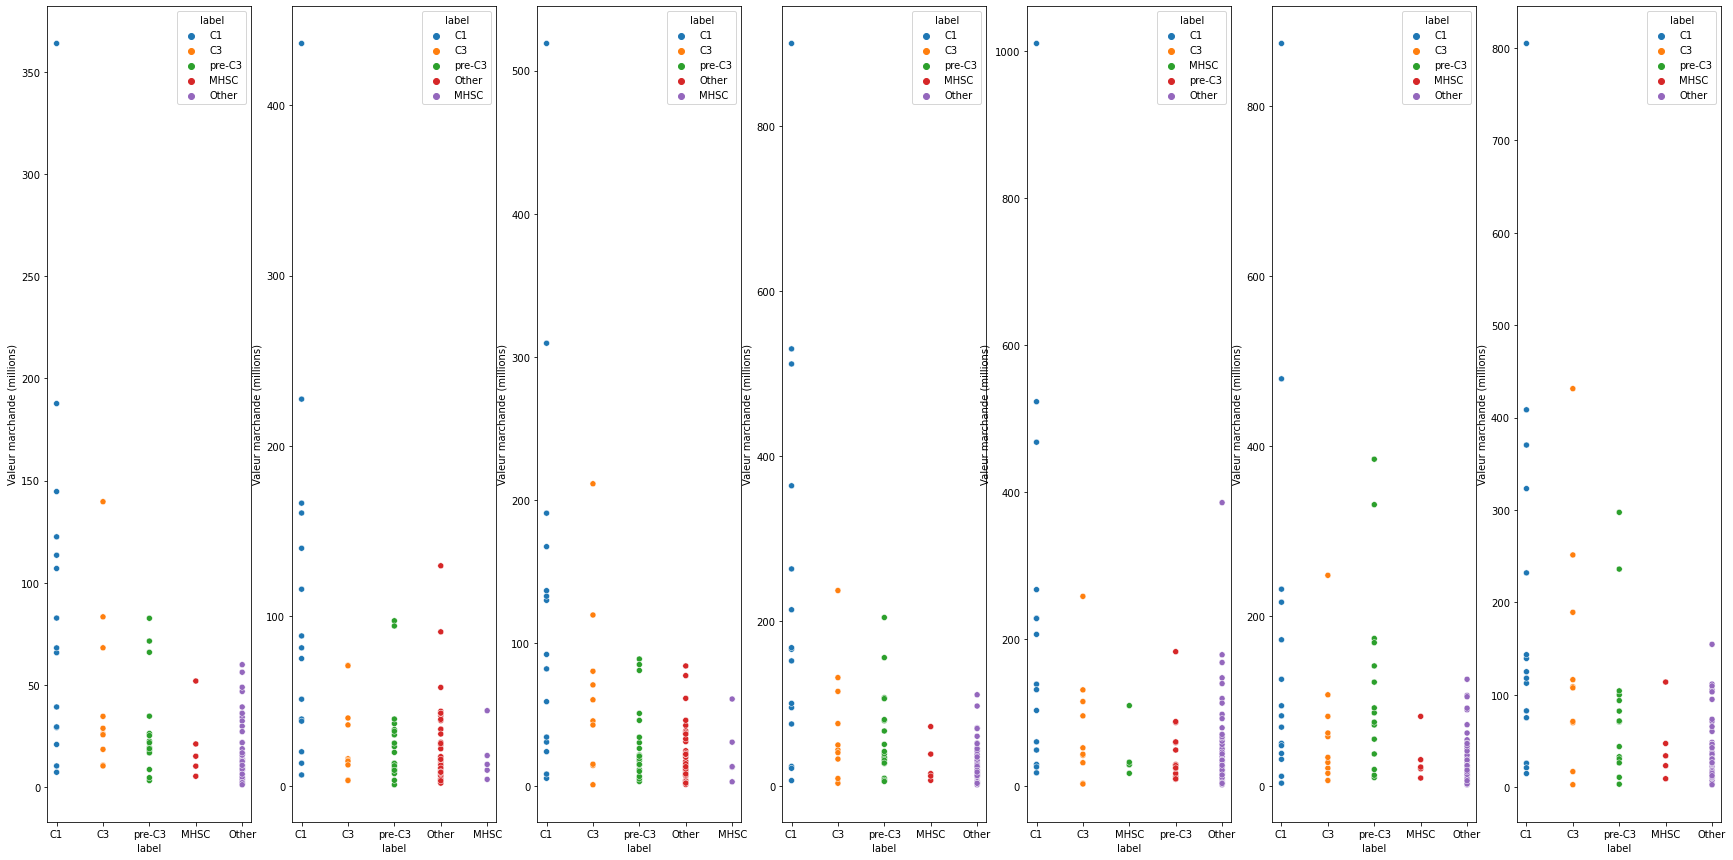

In [122]:
plt.figure(figsize=[30,15])
plt.subplot(171)
sns.scatterplot(x="label",y='Valeur marchande (millions)',hue='label',data=df_lig_val_af[df_lig_val_af['Years'] == 2014])
plt.subplot(172)
sns.scatterplot(x="label",y='Valeur marchande (millions)',hue='label',data=df_lig_val_af[df_lig_val_af['Years'] == 2015])
plt.subplot(173)
sns.scatterplot(x="label",y='Valeur marchande (millions)',hue='label',data=df_lig_val_af[df_lig_val_af['Years'] == 2016])
plt.subplot(174)
sns.scatterplot(x="label",y='Valeur marchande (millions)',hue='label',data=df_lig_val_af[df_lig_val_af['Years'] == 2017])
plt.subplot(175)
sns.scatterplot(x="label",y='Valeur marchande (millions)',hue='label',data=df_lig_val_af[df_lig_val_af['Years'] == 2018])
plt.subplot(176)
sns.scatterplot(x="label",y='Valeur marchande (millions)',hue='label',data=df_lig_val_af[df_lig_val_af['Years'] == 2019])
plt.subplot(177)
sns.scatterplot(x="label",y='Valeur marchande (millions)',hue='label',data=df_lig_val_af[df_lig_val_af['Years'] == 2020])
plt.show()

In [22]:
df_lig_val_group = np.around(df_lig_val_af[df_lig_val_af['Positions'] == 'Total'].groupby(['Years','label']).mean().reset_index(),decimals=1)

In [23]:
df_lig_val_group.pivot(index='label',columns='Years',values='Valeur marchande (millions)')

Years,2014,2015,2016,2017,2018,2019,2020
label,,,,,,,
C1,232.1,276.7,320.4,597.9,581.8,420.7,499.5
C3,111.5,70.9,165.5,184.0,194.8,164.7,341.4
MHSC,52.0,44.4,61.0,71.8,109.8,81.7,113.8
Other,40.7,54.7,48.6,67.1,128.9,77.6,98.9
pre-C3,73.4,65.1,76.4,143.0,119.4,296.3,212.6


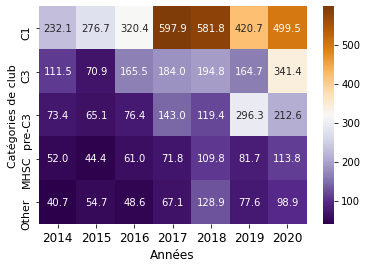

In [28]:
res = sns.heatmap(df_lig_val_group.pivot(index='label',columns='Years',values='Valeur marchande (millions)').reindex(['C1','C3','pre-C3','MHSC','Other']),annot=True,fmt='.1f',cmap='PuOr_r')
for t in res.texts: t.set_text(t.get_text())
plt.ylabel('Catégories de club',fontsize=11)
plt.xlabel('Années',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)
plt.show()

In [164]:
df_lig_val_af.columns

Index(['Rank', 'Team', 'M', 'W', 'D', 'L', 'G', 'GA', 'PTS', 'xG', 'xGA',
       'xPTS', 'Years', 'xG coef', 'xGA coef', 'xPTS coef', 'dif PTS', 'label',
       'Positions', 'Âge', 'Valeur marchande (millions)',
       'Valeur marchande moyenne (millions)', 'dif G', 'dif GA'],
      dtype='object')

In [171]:
df_value_pond_bef = []
for i in list(df_lig_val_af['Team'].unique()):
    for a in list(df_lig_val_af['Years'].unique()):
        try:
            gardien = 0.5*int(df_lig_val_af[(df_lig_val_af['Team'] == i)&(df_lig_val_af['Years'] == a)&(df_lig_val_af['Positions'] == 'Gardien')]['Valeur marchande (millions)'])
            defense = int(df_lig_val_af[(df_lig_val_af['Team'] == i)&(df_lig_val_af['Years'] == a)&(df_lig_val_af['Positions'] == 'Défense')]['Valeur marchande (millions)'])
            milieu = 0.5*int(df_lig_val_af[(df_lig_val_af['Team'] == i)&(df_lig_val_af['Years'] == a)&(df_lig_val_af['Positions'] == 'Milieu de terrain')]['Valeur marchande (millions)'])
            attaque = int(df_lig_val_af[(df_lig_val_af['Team'] == i)&(df_lig_val_af['Years'] == a)&(df_lig_val_af['Positions'] == 'Attaquant')]['Valeur marchande (millions)'])
            total = int(df_lig_val_af[(df_lig_val_af['Team'] == i)&(df_lig_val_af['Years'] == a)&(df_lig_val_af['Positions'] == 'Total')]['Valeur marchande (millions)'])
            rank = df_lig_val_af[(df_lig_val_af['Team'] == i)&(df_lig_val_af['Years'] == a)&(df_lig_val_af['Positions'] == 'Total')]['Rank']
            pts = df_lig_val_af[(df_lig_val_af['Team'] == i)&(df_lig_val_af['Years'] == a)&(df_lig_val_af['Positions'] == 'Total')]['PTS']
            buts = df_lig_val_af[(df_lig_val_af['Team'] == i)&(df_lig_val_af['Years'] == a)&(df_lig_val_af['Positions'] == 'Total')]['G']
            buts_enc = df_lig_val_af[(df_lig_val_af['Team'] == i)&(df_lig_val_af['Years'] == a)&(df_lig_val_af['Positions'] == 'Total')]['GA']
            xbuts = df_lig_val_af[(df_lig_val_af['Team'] == i)&(df_lig_val_af['Years'] == a)&(df_lig_val_af['Positions'] == 'Total')]['xG']
            xbuts_enc = df_lig_val_af[(df_lig_val_af['Team'] == i)&(df_lig_val_af['Years'] == a)&(df_lig_val_af['Positions'] == 'Total')]['xGA']
            win_rate = df_lig_val_af[(df_lig_val_af['Team'] == i)&(df_lig_val_af['Years'] == a)&(df_lig_val_af['Positions'] == 'Total')]['win_rate']
            #unwin_rate = df_lig_val_af[(df_lig_val_af['Team'] == i)&(df_lig_val_af['Years'] == a)&(df_lig_val_af['Positions'] == 'Total')]['unwin_rate']
            dif_pts = df_lig_val_af[(df_lig_val_af['Team'] == i)&(df_lig_val_af['Years'] == a)&(df_lig_val_af['Positions'] == 'Total')]['dif PTS']
            df_value_pond_bef.append(pd.DataFrame({'Rank':rank,'Team':i,'Years':a,'PTS':pts,'dif_PTS':dif_pts,'win_rate':win_rate,'G':buts,'GA':buts_enc,'xG':xbuts,'xGA':xbuts_enc,'Value totale':total,'Value attaque': np.around((attaque+milieu*0.25)/1.25,decimals=3),'Value défense': np.around((gardien*0.5+defense*1.25+milieu*0.25)/2,decimals=3)}))
        except TypeError:
            continue

In [172]:
value_pond_bef = pd.concat(df_value_pond_bef)

In [173]:
value_pond_bef.to_csv('pond_value.csv', index=False)

### Corrélation valeurs marchande pondérée / buts marqués - encaissés

In [174]:
value_pond = pd.read_csv('pond_value.csv',sep=',')

In [175]:
for i in value_pond['Team']:
    if 'Evian' in i:
        print(i)

Evian Thonon Gaillard


In [176]:
value_pond

,Rank,Team,Years,PTS,dif_PTS,win_rate,G,GA,xG,xGA,Value totale,Value attaque,Value défense
0,1,Paris Saint Germain,2014,83,-1.100,0.632,83,36,78.420,28.240,363,97.8,80.750
1,1,Paris Saint Germain,2015,96,5.730,0.789,102,19,86.200,24.370,436,139.5,96.562
2,2,Paris Saint Germain,2016,87,-0.220,0.711,83,27,82.160,24.250,519,168.7,98.438
3,1,Paris Saint Germain,2017,93,8.390,0.763,108,29,89.920,32.100,900,430.1,110.562
4,1,Paris Saint Germain,2018,91,4.960,0.763,105,35,95.340,36.780,1010,441.2,160.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,9,Nimes,2018,53,3.100,0.395,57,58,48.500,55.470,88,22.8,18.000
135,18,Nimes,2019,37,-7.365,0.263,39,59,40.972,54.924,49,8.5,10.188
136,19,Nimes,2020,35,-4.700,0.237,40,71,41.390,64.170,60,11.0,12.125
137,14,Brest,2019,46,4.417,0.289,46,50,40.782,59.864,47,10.7,8.188


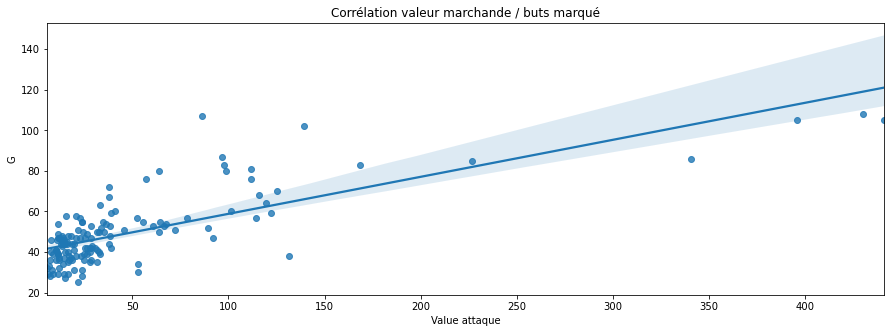

Covariance empirique :  929.1516329382537
Coefficient de Pearson :  0.7558912197583534

Les valeurs suivent une distribution linéaire


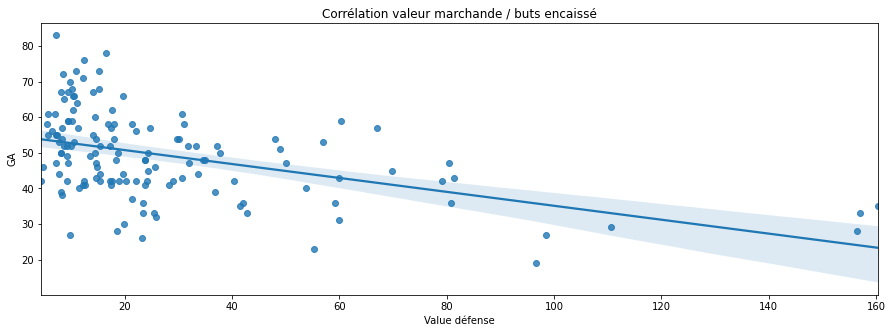

Covariance empirique :  -158.11263407691115
Coefficient de Pearson :  -0.46082804776249325

Les valeurs suivent une distribution linéaire


In [177]:
# buts marqué
#défense
plt.figure(figsize=[15,5])
sns.regplot(x="Value attaque",y='G',data=value_pond)
plt.title('Corrélation valeur marchande / buts marqué')
plt.show()
corré_quant(value_pond["Value attaque"],value_pond["G"])
plt.figure(figsize=[15,5])
sns.regplot(x='Value défense',y='GA',data=value_pond)
plt.title('Corrélation valeur marchande / buts encaissé')
plt.show()
corré_quant(value_pond['Value défense'],value_pond['GA'])

In [178]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = ['https://sofifa.com/players?type=all&lg%5B0%5D=16&showCol%5B0%5D=ae&showCol%5B1%5D=hi&showCol%5B2%5D=bp&showCol%5B3%5D=ta&showCol%5B4%5D=ts&showCol%5B5%5D=to&showCol%5B6%5D=ac&showCol%5B7%5D=sp&showCol%5B8%5D=td&showCol%5B9%5D=tg&hl=fr-FR&r=140052&set=true&offset=',
        'https://sofifa.com/players?type=all&lg%5B0%5D=16&showCol%5B0%5D=ae&showCol%5B1%5D=hi&showCol%5B2%5D=bp&showCol%5B3%5D=ta&showCol%5B4%5D=ts&showCol%5B5%5D=to&showCol%5B6%5D=ac&showCol%5B7%5D=sp&showCol%5B8%5D=td&showCol%5B9%5D=tg&hl=fr-FR&r=150059&set=true&offset=',
       'https://sofifa.com/players?type=all&lg%5B0%5D=16&showCol%5B0%5D=ae&showCol%5B1%5D=hi&showCol%5B2%5D=bp&showCol%5B3%5D=ta&showCol%5B4%5D=ts&showCol%5B5%5D=to&showCol%5B6%5D=ac&showCol%5B7%5D=sp&showCol%5B8%5D=td&showCol%5B9%5D=tg&hl=fr-FR&r=160058&set=true&offset=',
       'https://sofifa.com/players?type=all&lg%5B0%5D=16&showCol%5B0%5D=ae&showCol%5B1%5D=hi&showCol%5B2%5D=bp&showCol%5B3%5D=ta&showCol%5B4%5D=ts&showCol%5B5%5D=to&showCol%5B6%5D=ac&showCol%5B7%5D=sp&showCol%5B8%5D=td&showCol%5B9%5D=tg&hl=fr-FR&r=170099&set=true&offset=',
       'https://sofifa.com/players?type=all&lg%5B0%5D=16&showCol%5B0%5D=ae&showCol%5B1%5D=hi&showCol%5B2%5D=bp&showCol%5B3%5D=ta&showCol%5B4%5D=ts&showCol%5B5%5D=to&showCol%5B6%5D=ac&showCol%5B7%5D=sp&showCol%5B8%5D=td&showCol%5B9%5D=tg&hl=fr-FR&r=180084&set=true&offset=',
       'https://sofifa.com/players?type=all&lg%5B0%5D=16&showCol%5B0%5D=ae&showCol%5B1%5D=hi&showCol%5B2%5D=bp&showCol%5B3%5D=ta&showCol%5B4%5D=ts&showCol%5B5%5D=to&showCol%5B6%5D=ac&showCol%5B7%5D=sp&showCol%5B8%5D=td&showCol%5B9%5D=tg&hl=fr-FR&r=190075&set=true&offset=',
       'https://sofifa.com/players?type=all&lg%5B0%5D=16&showCol%5B0%5D=ae&showCol%5B1%5D=hi&showCol%5B2%5D=bp&showCol%5B3%5D=ta&showCol%5B4%5D=ts&showCol%5B5%5D=to&showCol%5B6%5D=ac&showCol%5B7%5D=sp&showCol%5B8%5D=td&showCol%5B9%5D=tg&hl=fr-FR&r=200061&set=true&offset=']

In [127]:
b = 0
list_error_name = [' L. Messi',' L. Messi',' L. Messi',' Cristiano Ronaldo',' L. Messi',' L. Messi',' L. Messi']
list_page_glob = []
x = 2014
for i in page:
    y = 0
    list_page = []
    while str(requests.get("{}{}".format(str(i),str(y)), headers=headers)) == '<Response [200]>':
        print(x,y)
        #print("{}{}".format(str(i),str(y)),"{}{}".format(str(i),str(y))=='https://sofifa.com/players')
        pageTree = requests.get("{}{}".format(str(i),str(y)), headers=headers)
        soup = BeautifulSoup(pageTree.content, 'html.parser')
        name = str(soup.body.find('div',{'class':'column col-auto'}).table.tbody.find_all('tr')[0].find('td',{"class":'col-name'}).find('div',{'class':'bp3-text-overflow-ellipsis'}).text)
        #print("{}{}".format(str(i),str(y)),name,b)
        if str(name) == list_error_name[b]:
            b = b + 1
            break
        else:
            list_name = []
            list_name.append(name)
            print(list_name)
            list_page.append("{}{}".format(str(i),str(y)))
            y = y +60
    x = x +1
    list_page_glob.append(list_page)

KeyboardInterrupt: 

In [ ]:


df_fifa = []
x = 2014

for k in list_page_glob:
    #print(k)
    for e in k:
        pageTree = requests.get(e, headers=headers)
        soup = BeautifulSoup(pageTree.content, 'html.parser')
        
        value = soup.body.find('div',{'class':'column col-auto'}).table.tbody.find_all('tr')
        #print(value)
        for i in value:
            
            name = i.find('td',{"class":'col-name'}).find('div',{'class':'bp3-text-overflow-ellipsis'}).text
            age = i.find('td',{'class':'col col-ae'}).text
            club = i.find_all('td',{'class':'col-name'})[1].find('div',{'class':'bp3-text-overflow-ellipsis'}).a.text
#             print(i)
            poste = i.find('td',{'class':'col col-bp'}).text
            poid = i.find('td',{'class':'col col-hi'}).text
            accele = int(i.find('td',{'class':'col col-sp'}).span.text)
            speed = int(i.find('td',{'class':'col col-ac'}).span.text)
            offensif = int(i.find('td',{'class':'col col-ta'}).span.text)
            tech = int(i.find('td',{'class':'col col-ts'}).span.text)
            mouv = int(i.find('td',{'class':'col col-to'}).span.text)
            def_gene = int(i.find('td',{'class':'col col-td'}).span.text)
            gardien = int(i.find('td',{'class':'col col-tg'}).span.text)
            df_fifa.append(pd.DataFrame({'name':[name],'poste':[poste],'Team':[club],'taille':[poid],'accélération':[accele],'speed':[speed],'offensif':[offensif],'technique':[tech],'mouvement':[mouv],'defense general':[def_gene],'gardien general':[gardien],'Years':x}))

        #print(df_fifa)
    x = x + 1
#     print(x)
fifa = pd.concat(df_fifa)

In [ ]:
# for i in fifa[fifa['Years'] == 2020]['poid']:
#     print(i.split('"')[0])
#     dist = Distance(=i.split('"')[0].split("'")[0],inch=i.split('"')[0].split("'")[1])
#     print(dist.m)

In [ ]:
fifa

In [ ]:
fifa.to_csv('fifa_glob.csv',index=False)

In [179]:
fifa = pd.read_csv('fifa_glob.csv',sep=',')

In [180]:
fifa

,name,poste,Team,taille,accélération,speed,offensif,technique,mouvement,defense general,gardien general,Years
0,Z. Ibrahimović,BU,Paris Saint-Germain,"6'5""",78,72,418,410,362,101,59,2014
1,Falcao,BU,AS Monaco,"5'9""",77,80,405,370,407,92,43,2014
2,Thiago Silva,DC,Paris Saint-Germain,"6'0""",81,79,319,364,389,270,45,2014
3,E. Cavani,BU,Paris Saint-Germain,"6'0""",86,79,402,362,393,96,53,2014
4,J. Toulalan,MDC,AS Monaco,"6'0""",56,54,276,343,311,228,45,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
4215,A. Dia,G,Olympique de Marseille,"6'0""",32,29,75,74,189,39,277,2020
4216,F. Bloch,G,Toulouse Football Club,"6'3""",18,29,57,73,165,36,272,2020
4217,V. Rabouille,G,Nîmes Olympique,"6'2""",17,19,62,69,166,29,266,2020
4218,E. Hatfout,G,Dijon FCO,"6'4""",19,29,58,72,172,29,274,2020


In [181]:
list_taille = []
for i in fifa['taille']:
    list_taille.append(np.around(int(i.split('"')[0].split("'")[0])*30.48 + int(i.split('"')[0].split("'")[1])*2.54,decimals=0))

In [182]:
fifa['taille'] = list_taille

In [183]:
moy_playeurs = fifa.groupby(['poste','Years']).mean().reset_index()

In [184]:
moy_playeurs

,poste,Years,taille,accélération,speed,offensif,technique,mouvement,defense general,gardien general
0,AD,2014,177.733333,81.422222,82.200000,313.377778,318.311111,379.133333,88.266667,48.444444
1,AD,2015,177.131579,82.105263,83.157895,308.473684,311.526316,381.552632,90.868421,48.921053
2,AD,2016,175.522727,82.613636,82.272727,322.068182,323.863636,389.477273,89.318182,51.909091
3,AD,2017,176.000000,80.333333,81.055556,296.111111,292.333333,376.055556,79.722222,52.500000
4,AD,2018,177.294118,80.705882,81.647059,308.058824,303.764706,374.647059,75.764706,52.411765
...,...,...,...,...,...,...,...,...,...,...
99,MOC,2016,178.354167,68.354167,68.666667,316.208333,342.958333,348.520833,127.666667,53.000000
100,MOC,2017,176.756098,72.731707,74.060976,316.487805,349.817073,365.621951,127.085366,52.719512
101,MOC,2018,176.962500,70.787500,71.762500,319.812500,350.412500,358.800000,124.412500,53.162500
102,MOC,2019,176.517857,70.767857,72.571429,315.678571,348.089286,360.910714,138.500000,53.107143


In [185]:
from itertools import zip_longest
years = fifa['Years'].unique()
df_off_coef = []
for i in years:
    poste = ['BU','MOC', 'AG', 'AD','AT','MC']
    for e in poste:
        value = fifa[(fifa['Years'] == i)&(fifa['poste'] == e)]
        for q,k,a,j,l,g in zip_longest(value['Team'],value['accélération'],value['speed'],value['offensif'],value['technique'],value['mouvement']):
            #print(q,k,a,i,l,g)
            value_moy = moy_playeurs[(moy_playeurs['Years'] == i)&(moy_playeurs['poste'] == e)]
#             print(value_moy['accélération'],value_moy['speed'],value_moy['offensif'],value_moy['technique'],value_moy['mouvement'])
            accel = np.around(k/int(value_moy['accélération']),decimals=3)
            speedo = np.around(a/int(value_moy['speed']),decimals=3)
            offense = np.around(j/int(value_moy['offensif']),decimals=3)
            tech = np.around(l/int(value_moy['technique']),decimals=3)
            mouv = np.around(g/int(value_moy['mouvement']),decimals=3)
            df_off_coef.append(pd.DataFrame({'Team':[q],'poste':[e],'accélération':[accel], 'speed':[speedo], 'offensif':[offense],
       'technique':[tech], 'mouvement':[mouv], 'Years':[i]}))
off_coef = pd.concat(df_off_coef)

In [186]:
from itertools import zip_longest
years = fifa['Years'].unique()
df_off_coef = []
for i in years:
    poste = ['DC', 'MDC', 'DLG','DG', 'DLD', 'DD']
    for e in poste:
        value = fifa[(fifa['Years'] == i)&(fifa['poste'] == e)]
        for q,k,a,j,l,g in zip_longest(value['Team'],value['taille'],value['accélération'],value['speed'],value['defense general'],value['gardien general']):
            #print(q,k,a,i,l,g)
            value_moy = moy_playeurs[(moy_playeurs['Years'] == i)&(moy_playeurs['poste'] == e)]
#             print(value_moy['accélération'],value_moy['speed'],value_moy['offensif'],value_moy['technique'],value_moy['mouvement'])
            accel = np.around(a/int(value_moy['accélération']),decimals=3)
            speedo = np.around(j/int(value_moy['speed']),decimals=3)
            tail = np.around(k/float(value_moy['taille']),decimals=3)
            def_gene = np.around(l/int(value_moy['defense general']),decimals=3)
            df_off_coef.append(pd.DataFrame({'Team':[q],'poste':[e], 'taille':[tail],'accélération':[accel], 'speed':[speedo],
       'defense generale':[def_gene], 'Years':[i]}))
def_coef = pd.concat(df_off_coef)

In [187]:
from itertools import zip_longest
years = fifa['Years'].unique()
df_off_coef = []
for i in years:
    value = fifa[(fifa['Years'] == i)&(fifa['poste'] == 'G')]
    for q,k,a in zip_longest(value['Team'],value['taille'],value['gardien general']):
        value_moy = moy_playeurs[(moy_playeurs['Years'] == i)&(moy_playeurs['poste'] == 'G')]
#             print(value_moy['accélération'],value_moy['speed'],value_moy['offensif'],value_moy['technique'],value_moy['mouvement'])
        tail = np.around(k/float(value_moy['taille']),decimals=3)
        gard = np.around(a/int(value_moy['gardien general']),decimals=3)
        df_off_coef.append(pd.DataFrame({'Team':[q],'poste':'G', 'taille':[tail],'gardien generale':[gard], 'Years':[i]}))
gard_coef = pd.concat(df_off_coef)

In [188]:
gard_coef['coef'] = np.around((gard_coef['taille']+gard_coef['gardien generale']*1.5)/2.5,decimals=5)

In [189]:
def_coef['coef'] = np.around((def_coef['taille']+def_coef['accélération']+def_coef['speed']+def_coef['defense generale']*1.5)/4.5,decimals=5)

In [190]:
off_coef['coef'] = np.around((off_coef['offensif']*1.5+off_coef['accélération']+off_coef['speed']+off_coef['mouvement']+off_coef['technique'])/5.5,decimals=5)

In [191]:
def_coef = def_coef[['Team','poste','Years','coef']]

In [192]:
gard_coef = gard_coef[['Team','poste','Years','coef']]

In [193]:
off_coef = off_coef[['Team','poste','Years','coef']]

In [194]:
list_def_coef = []
def_coef[def_coef['poste'] == 'DC']['coef'] = def_coef[def_coef['poste'] == 'DC']['coef']*1.5
list_def_coef.append(def_coef[def_coef['poste'] == 'DC'])
list_def_coef.append(def_coef[def_coef['poste'] != 'DC'])
list_def_coef.append(gard_coef)
def_coef_glob = pd.concat(list_def_coef)

<ipython-input-194-03152599a842>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def_coef[def_coef['poste'] == 'DC']['coef'] = def_coef[def_coef['poste'] == 'DC']['coef']*1.5


In [195]:
list_off_coef = []
off_coef[off_coef['poste'] == 'MC']['coef'] = off_coef[off_coef['poste'] == 'MC']['coef']*0.75
list_off_coef.append(off_coef[off_coef['poste'] == 'MC'])
list_off_coef.append(off_coef[off_coef['poste'] != 'MC'])
off_coef_glob = pd.concat(list_off_coef)

<ipython-input-195-f028df8da51d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_coef[off_coef['poste'] == 'MC']['coef'] = off_coef[off_coef['poste'] == 'MC']['coef']*0.75


In [196]:
off_coef_glob = off_coef_glob.groupby(['Team','Years']).mean().reset_index().sort_values(by='coef',ascending=False)

In [197]:
def_coef_glob = def_coef_glob.groupby(['Team','Years']).mean().reset_index().sort_values(by='coef',ascending=False)

In [198]:
df_coef = def_coef_glob.merge(off_coef_glob,how='inner',on=['Team','Years'])
df_coef.rename(columns={'coef_x':'coef défense','coef_y':'coef attaque'},inplace=True)

In [199]:
df_coef[df_coef['Team'] == 'Toulouse Football Club' ]

,Team,Years,coef défense,coef attaque
42,Toulouse Football Club,2016,1.013516,1.021829
45,Toulouse Football Club,2015,1.013298,1.000891
49,Toulouse Football Club,2017,1.008097,1.014954
61,Toulouse Football Club,2014,1.003642,0.993386
62,Toulouse Football Club,2018,1.003494,1.007727
63,Toulouse Football Club,2019,1.002697,1.041819
67,Toulouse Football Club,2020,1.001578,0.960357


In [200]:
value_pond['Team'].unique()

array(['Paris Saint Germain', 'Lyon', 'Monaco', 'Marseille',
       'Saint-Etienne', 'Bordeaux', 'Montpellier', 'Lille', 'Rennes',
       'Guingamp', 'Nice', 'SC Bastia', 'Caen', 'Nantes', 'Reims',
       'Lorient', 'Toulouse', 'Evian Thonon Gaillard', 'Metz', 'Lens',
       'Angers', 'Troyes', 'Dijon', 'Nancy', 'Amiens', 'Strasbourg',
       'Nimes', 'Brest'], dtype=object)

In [201]:
df_coef['Team'] = [i.replace('Olympique Lyonnais','Lyon') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('Paris Saint-Germain','Paris Saint Germain') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('AS Monaco','Monaco') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('Olympique de Marseille','Marseille') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('AS Saint-Étienne','Saint-Etienne') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('RC Strasbourg Alsace','Strasbourg') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('Montpellier HSC','Montpellier') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('LOSC','Lille') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('OGC Nice','Nice') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('Stade Brestois 29','Brest') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('Nîmes Olympique','Nimes') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('FC Lorient','Lorient') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('AS Nancy Lorraine','Nancy') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('Stade de Reims','Reims') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('Stade Rennais FC','Rennes') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('Stade Malherbe Caen','Caen') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('Amiens SC','Amiens') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('Angers SCO','Angers') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('Racing Club de Lens','Lens') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('Dijon FCO','Dijon') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('FC Girondins de Bordeaux','Bordeaux') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('ESTAC Troyes','Troyes') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('Toulouse Football Club','Toulouse') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('FC Metz','Metz') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('FC Nantes','Nantes') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('En Avant de Guingamp','Guingamp') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('Evian Thonon Gaillard Football Club','Evian Thonon Gaillard') for i in df_coef['Team']]
df_coef['Team'] = [i.replace('Sporting Club de Bastia','SC Bastia') for i in df_coef['Team']]

In [202]:
# Toulouse Metz Sochaux-Montbéliard Valenciennes Nantes En Avant de Guingamp

In [203]:
for i,h in zip(df_coef['Team'].unique(),value_pond['Team'].unique()):
#     print(i,h)
    if (i not in df_coef['Team'].unique())|(i not in value_pond['Team'].unique()):
        print(i,'i')
    elif (h not in value_pond['Team'].unique())|(h not in df_coef['Team'].unique()):
        print(h,'k')

FC Sochaux-Montbéliard i
Valenciennes FC i


In [266]:
print(value_pond.shape,df_coef.shape)

(139, 13) (140, 4)


In [204]:
all_value = value_pond.merge(df_coef,how='inner',on=['Team','Years'])

In [270]:
all_value['Team'].unique()

array(['Paris Saint Germain', 'Lyon', 'Monaco', 'Marseille',
       'Saint-Etienne', 'Bordeaux', 'Montpellier', 'Lille', 'Rennes',
       'Guingamp', 'Nice', 'SC Bastia', 'Caen', 'Nantes', 'Reims',
       'Lorient', 'Toulouse', 'Evian Thonon Gaillard', 'Metz', 'Angers',
       'Dijon', 'Amiens', 'Strasbourg', 'Nimes', 'Brest'], dtype=object)

In [205]:
all_value.to_csv('merge_value.csv',index=False)

In [206]:
all_value = pd.read_csv('merge_value.csv',sep=',')

In [207]:
list_euro = []
list_euro_detail = []
for i in all_value['Rank']:
    if i < 6:
        list_euro.append('Européen')
        if i < 4: 
            list_euro_detail.append('CL')
        else:
            list_euro_detail.append('EL')
    else:
        list_euro.append('Non-Européen')
        list_euro_detail.append('NE')
all_value['is_euro'] = list_euro
all_value['is_euro_detail'] = list_euro_detail

In [208]:
#méthode de calcul et d'affichage des cercles de corrélation et de l'ACP

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, pca, axis_ranks, labels=None, alpha=1):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    
    fig_1 = plt.figure(figsize=(8,7))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.savefig('Eboulis.png')
    plt.show(block=False)

In [209]:
all_value.columns

Index(['Rank', 'Team', 'Years', 'PTS', 'dif_PTS', 'win_rate', 'G', 'GA', 'xG',
       'xGA', 'Value totale', 'Value attaque', 'Value défense', 'coef défense',
       'coef attaque', 'is_euro', 'is_euro_detail'],
      dtype='object')

In [227]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn import decomposition
from sklearn import preprocessing

data = all_value[['PTS', 'G', 'GA', 'Value totale',
       'Value attaque', 'Value défense', 'coef défense', 'coef attaque','win_rate']]
X = data.values

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA(n_components = 4)
pca.fit(X_scaled)

PCA(n_components=4)

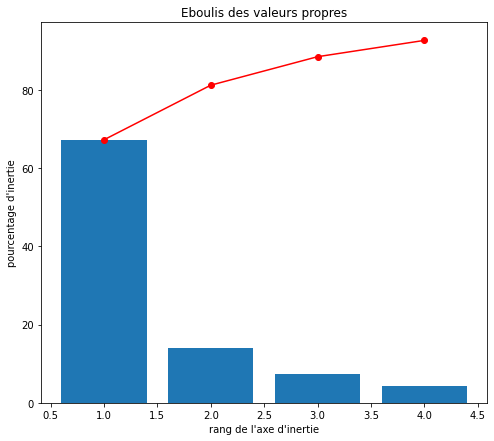

In [218]:
display_scree_plot(pca)

In [219]:
data.columns

Index(['PTS', 'G', 'GA', 'Value totale', 'Value attaque', 'Value défense',
       'coef défense', 'coef attaque', 'win_rate', 'dif_PTS'],
      dtype='object')

v1 : PTS
v2 : Buts marqués
v3 : Buts encaissés
v4 : Value totale
v5 : Value attaque
v6 : Value défense
v7 : coef défense
v8 : coef attaque
v9 : win rate
v10 : dif_PTS


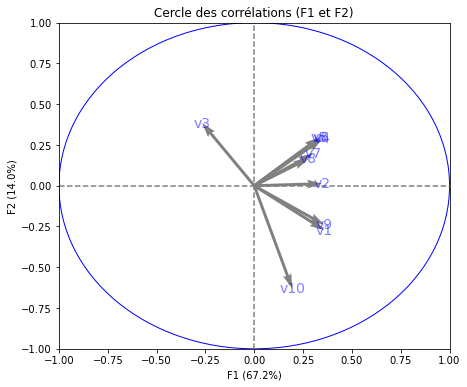

v3 est anti-corrélés aux variables PTS et coef attaque
v4,v5 et v6 ne sont corrélés à aucuns axes
v2,v7, v8 et v1 semblent être corrélés cependant les coefficients de corrélation sont plutôt faibles et traduisent une perte d'information
     
F1 : Capacité à faire avoir de bonnes performances / bon classement
     
F2 : incapacité à défendre
     


In [221]:
#ACP
features = data.columns
pcs = pca.components_
var = ['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','v11']

print('v1 : PTS')
print('v2 : Buts marqués')
print('v3 : Buts encaissés')
print('v4 : Value totale')
print('v5 : Value attaque')
print('v6 : Value défense')
print('v7 : coef défense')
print('v8 : coef attaque')
print('v9 : win rate')
print('v10 : dif_PTS')

#display_circles(pcs, 4, pca, [(0,1),(2,3),(4,5)],labels = np.array(features))
display_circles(pcs, 4, pca, [(0,1)],labels = np.array(var))

X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected_2, 4, pca2, [(0,1),(2,3)], alpha = 0.2)

print('v3 est anti-corrélés aux variables PTS et coef attaque')
print('v4,v5 et v6 ne sont corrélés à aucuns axes')
print("v2,v7, v8 et v1 semblent être corrélés cependant les coefficients de corrélation sont plutôt faibles et traduisent une perte d'information")
print(' '*5)
print('F1 : Capacité à faire avoir de bonnes performances / bon classement')
print(' '*5)
print('F2 : incapacité à défendre')
print(' '*5)


plt.show()

In [222]:
f1 = []
f2 = []
for i in X_projected:
    f1.append(i[0])
    f2.append(i[1])
    
all_value['F1'] = f1
all_value['F2'] = f2

### La qualité de représentation des individus

In [223]:
data_compo = pd.DataFrame(X_projected,index=data.index,columns=["F"+str(i+1) for i in range(4)])
data_compo = data_compo.drop(['F3','F4'],axis=1)
data_compo

,F1,F2
0,4.458563,0.584481
1,6.666895,-0.513158
2,5.475019,0.543636
3,8.667878,1.604869
4,9.283721,2.918862
...,...,...
117,-0.567703,-0.501803
118,-1.646323,1.187317
119,-2.627631,0.502784
120,-3.030212,0.696363


In [224]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data_compo.values
#instanciation
sc = StandardScaler()
#transformation
Z = sc.fit_transform(X)

In [225]:
data_compo['is_euro'] = all_value['is_euro']
data_compo['is_euro_detail'] = all_value['is_euro_detail']

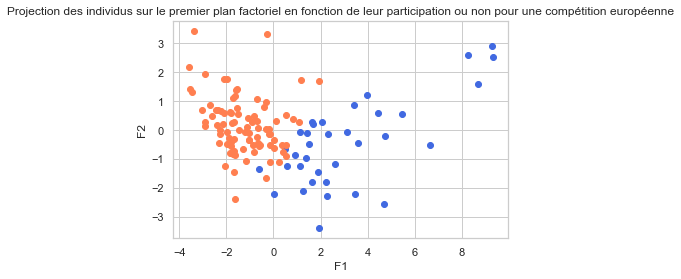

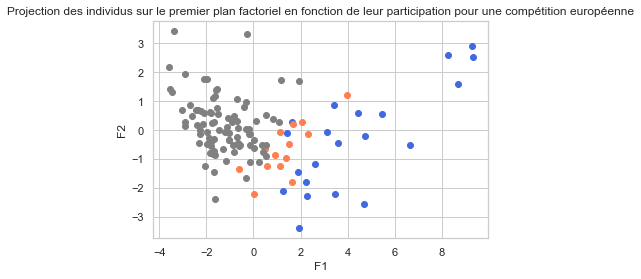

In [226]:
figsize = [15,7]
sns.set(style="whitegrid")
plt.scatter(data_compo[data_compo['is_euro'] == 'Européen']['F1'],data_compo[data_compo['is_euro'] == 'Européen']['F2'],c = 'royalblue')
plt.scatter(data_compo[data_compo['is_euro'] == 'Non-Européen']['F1'],data_compo[data_compo['is_euro'] == 'Non-Européen']['F2'],c = 'coral')
plt.title('Projection des individus sur le premier plan factoriel en fonction de leur participation ou non pour une compétition européenne')
plt.xlabel('F1')
plt.ylabel('F2')
plt.savefig('project1.png')
plt.show()
figsize = [15,7]
sns.set(style="whitegrid")
plt.scatter(data_compo[data_compo['is_euro_detail'] == 'CL']['F1'],data_compo[data_compo['is_euro_detail'] == 'CL']['F2'],c = 'royalblue')
plt.scatter(data_compo[data_compo['is_euro_detail'] == 'EL']['F1'],data_compo[data_compo['is_euro_detail'] == 'EL']['F2'],c = 'coral')
plt.scatter(data_compo[data_compo['is_euro_detail'] == 'NE']['F1'],data_compo[data_compo['is_euro_detail'] == 'NE']['F2'],c = 'grey')
plt.title('Projection des individus sur le premier plan factoriel en fonction de leur participation pour une compétition européenne')
plt.xlabel('F1')
plt.ylabel('F2')
plt.savefig('project1.png')
plt.show()

In [285]:
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)

p = data_compo[['F1','F2']].shape[1]
di = np.sum(Z**2,axis=1)
contribu = pd.DataFrame({'d_i':di})
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
data_cos = pd.DataFrame({'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})

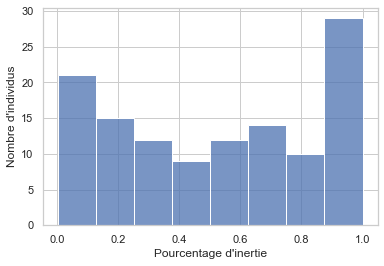

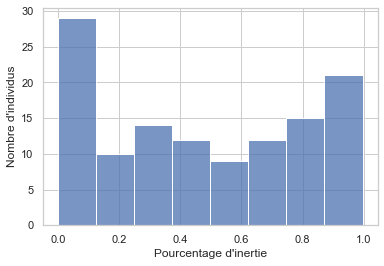

In [286]:
sns.histplot(x='COS2_1',data=data_cos)
plt.ylabel('Nombre d\'individus')
plt.xlabel('Pourcentage d\'inertie')
plt.show()
sns.histplot(x='COS2_2',data=data_cos)
plt.ylabel('Nombre d\'individus')
plt.xlabel('Pourcentage d\'inertie')
plt.show()

In [287]:
all_value[all_value['F1'] > 4]

,Rank,Team,Years,PTS,win_rate,unwin_rate,G,GA,xG,xGA,Value totale,Value attaque,Value défense,coef défense,coef attaque,is_euro,is_euro_detail,F1,F2
0,1,Paris Saint Germain,2014,83.0,0.632,0.368,83.000,36.000,78.420,28.240,363,97.8,80.750,1.060381,1.080608,Européen,CL,4.578064,-0.421167
1,1,Paris Saint Germain,2015,96.0,0.789,0.211,102.000,19.000,86.200,24.370,436,139.5,96.562,1.062208,1.090309,Européen,CL,6.626384,-1.384009
2,2,Paris Saint Germain,2016,87.0,0.711,0.289,83.000,27.000,82.160,24.250,519,168.7,98.438,1.061464,1.036588,Européen,CL,5.585874,-0.307883
3,1,Paris Saint Germain,2017,93.0,0.763,0.237,108.000,29.000,89.920,32.100,900,430.1,110.562,1.065006,1.058909,Européen,CL,8.638192,1.811125
4,1,Paris Saint Germain,2018,91.0,0.763,0.237,105.000,35.000,95.340,36.780,1010,441.2,160.375,1.071329,1.063279,Européen,CL,9.380105,3.035379
5,1,Paris Saint Germain,2019,96.0,0.816,0.184,105.556,33.778,107.554,31.568,874,395.7,156.938,1.067644,1.108637,Européen,CL,9.436014,2.233722
6,2,Paris Saint Germain,2020,82.0,0.684,0.316,86.000,28.000,83.890,36.850,805,340.7,156.562,1.082198,1.112145,Européen,CL,8.347318,2.107130
13,4,Lyon,2020,76.0,0.579,0.421,81.000,43.000,82.370,38.420,431,111.7,81.312,1.048934,1.073127,Européen,EL,4.119097,0.398446
16,1,Monaco,2016,95.0,0.789,0.211,107.000,31.000,76.040,34.890,309,86.5,59.938,1.021669,0.996123,Européen,CL,4.291587,-1.801240
17,2,Monaco,2017,80.0,0.632,0.368,85.000,45.000,62.410,45.270,529,226.9,69.812,1.034556,1.026618,Européen,CL,4.435069,0.897250


In [288]:
all_value[all_value['F2'] < -1]

,Rank,Team,Years,PTS,win_rate,unwin_rate,G,GA,xG,xGA,Value totale,Value attaque,Value défense,coef défense,coef attaque,is_euro,is_euro_detail,F1,F2
1,1,Paris Saint Germain,2015,96.0,0.789,0.211,102.000,19.000,86.200,24.370,436,139.5,96.562,1.062208,1.090309,Européen,CL,6.626384,-1.384009
7,2,Lyon,2014,75.0,0.579,0.421,72.000,33.000,62.850,41.710,144,37.7,23.438,1.027516,1.036084,Européen,CL,1.984164,-1.793368
14,3,Monaco,2014,71.0,0.526,0.474,51.000,26.000,56.610,37.620,187,72.4,23.250,1.013492,1.052546,Européen,CL,1.719269,-1.742885
16,1,Monaco,2016,95.0,0.789,0.211,107.000,31.000,76.040,34.890,309,86.5,59.938,1.021669,0.996123,Européen,CL,4.291587,-1.801240
21,4,Marseille,2014,69.0,0.553,0.447,76.000,42.000,60.630,36.410,139,57.0,24.125,1.018630,0.992956,Européen,EL,1.315668,-1.073712
26,2,Marseille,2019,76.0,0.579,0.421,55.643,39.357,49.427,43.496,216,64.6,36.875,1.001633,1.050352,Européen,CL,1.782920,-1.096133
28,5,Saint-Etienne,2014,69.0,0.500,0.500,51.000,30.000,46.490,38.240,83,21.8,19.875,1.031141,1.067506,Européen,EL,1.357391,-1.884917
29,6,Saint-Etienne,2015,58.0,0.447,0.553,42.000,37.000,45.460,44.660,97,28.7,21.438,1.006670,1.025107,Non-Européen,NE,0.117515,-1.160532
32,4,Saint-Etienne,2018,66.0,0.500,0.500,59.000,41.000,57.850,48.810,131,38.8,23.750,1.034137,1.001791,Européen,EL,0.951330,-1.034726
35,6,Bordeaux,2014,63.0,0.447,0.553,47.000,44.000,48.210,43.090,71,22.7,15.312,0.992904,0.971840,Non-Européen,NE,-0.555831,-1.109737


C:\Users\gormt\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


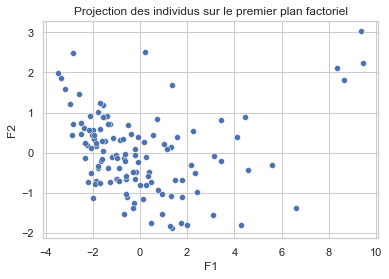

In [289]:
figsize = [15,7]
sns.set(style="whitegrid")
sns.scatterplot(all_value['F1'],all_value['F2'])
# sns.scatterplot(data_compo[data_compo['is_genuine'] == False]['F1'],data_compo[data_compo['is_genuine'] == False]['F2'],c = 'grey')

plt.title('Projection des individus sur le premier plan factoriel')
plt.xlabel('F1')
plt.ylabel('F2')
plt.savefig('project1.png')
plt.show()

### Corrélation entre F1 et le classement du club correspondant ? 

C:\Users\gormt\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


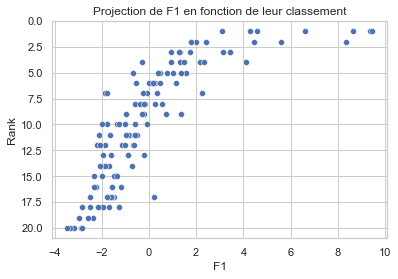

Covariance empirique :  -11.63083273619252
Coefficient de Pearson :  -0.7991516130294092

Les valeurs suivent une distribution linéaire


In [290]:
figsize = [15,7]
sns.set(style="whitegrid")
sns.scatterplot(all_value['F1'],all_value['Rank'])
# sns.scatterplot(data_compo[data_compo['is_genuine'] == False]['F1'],data_compo[data_compo['is_genuine'] == False]['F2'],c = 'grey')

plt.title('Projection de F1 en fonction de leur classement')
plt.xlabel('F1')
plt.ylabel('Rank')
plt.savefig('project1.png')
plt.ylim(21,0)
plt.show()
corré_quant(all_value['F1'],all_value['Rank'])

C:\Users\gormt\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


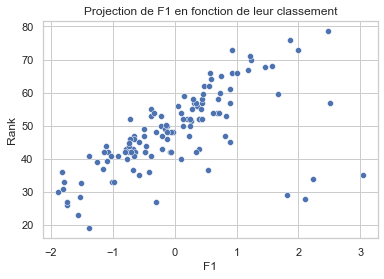

Covariance empirique :  2.61436917571795
Coefficient de Pearson :  0.46199802225447606

Les valeurs suivent une distribution linéaire


In [291]:
figsize = [15,7]
sns.set(style="whitegrid")
sns.scatterplot(all_value['F2'],all_value['GA'])
# sns.scatterplot(data_compo[data_compo['is_genuine'] == False]['F1'],data_compo[data_compo['is_genuine'] == False]['F2'],c = 'grey')

plt.title('Projection de F1 en fonction de leur classement')
plt.xlabel('F1')
plt.ylabel('Rank')
plt.savefig('project1.png')
#plt.ylim(21,0)
plt.show()
corré_quant(all_value['F2'],all_value['Rank'])

In [292]:
all_value = all_value[(all_value['GA'] > 40)|(all_value['F2'] < 1)]

Covariance empirique :  -9.313781158648483
Coefficient de Pearson :  -0.8455381999715276

Les valeurs suivent une distribution linéaire
Covariance empirique :  8.888231176273868
Coefficient de Pearson :  0.8474778822822648

Les valeurs suivent une distribution linéaire


C:\Users\gormt\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gormt\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


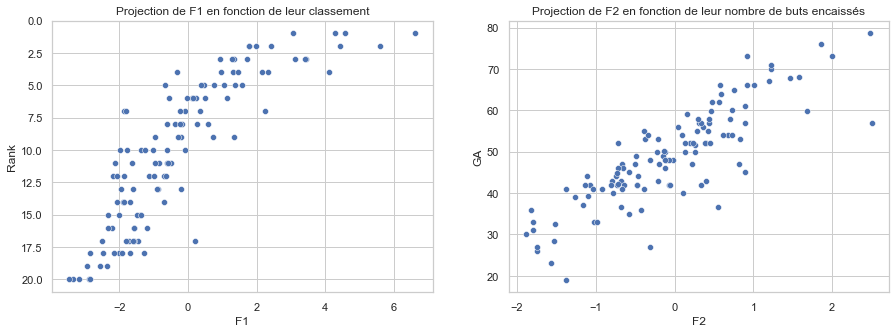

In [293]:
sns.set(style="whitegrid")
plt.figure(figsize=[15,5])
plt.subplot(121)
sns.scatterplot(all_value['F1'],all_value['Rank'])
# sns.scatterplot(data_compo[data_compo['is_genuine'] == False]['F1'],data_compo[data_compo['is_genuine'] == False]['F2'],c = 'grey')

plt.title('Projection de F1 en fonction de leur classement')
plt.xlabel('F1')
plt.ylabel('Rank')

plt.ylim(21,0)
corré_quant(all_value['F1'],all_value['Rank'])
corré_quant(all_value['F2'],all_value['GA'])
plt.subplot(122)
sns.scatterplot(all_value['F2'],all_value['GA'])
# sns.scatterplot(data_compo[data_compo['is_genuine'] == False]['F1'],data_compo[data_compo['is_genuine'] == False]['F2'],c = 'grey')

plt.title('Projection de F2 en fonction de leur nombre de buts encaissés')
plt.xlabel('F2')
plt.ylabel('GA')
#plt.ylim(21,0)
plt.show()

In [294]:
all_value[all_value['is_euro'] == 'Européen']

,Rank,Team,Years,PTS,win_rate,unwin_rate,G,GA,xG,xGA,Value totale,Value attaque,Value défense,coef défense,coef attaque,is_euro,is_euro_detail,F1,F2
0,1,Paris Saint Germain,2014,83.0,0.632,0.368,83.000,36.000,78.420,28.240,363,97.8,80.750,1.060381,1.080608,Européen,CL,4.578064,-0.421167
1,1,Paris Saint Germain,2015,96.0,0.789,0.211,102.000,19.000,86.200,24.370,436,139.5,96.562,1.062208,1.090309,Européen,CL,6.626384,-1.384009
2,2,Paris Saint Germain,2016,87.0,0.711,0.289,83.000,27.000,82.160,24.250,519,168.7,98.438,1.061464,1.036588,Européen,CL,5.585874,-0.307883
7,2,Lyon,2014,75.0,0.579,0.421,72.000,33.000,62.850,41.710,144,37.7,23.438,1.027516,1.036084,Européen,CL,1.984164,-1.793368
8,2,Lyon,2015,65.0,0.500,0.500,67.000,43.000,63.010,38.010,166,37.9,30.688,1.056758,1.044679,Européen,CL,1.788890,-0.681725
9,4,Lyon,2016,67.0,0.553,0.447,80.000,48.000,71.130,41.030,211,64.0,34.875,1.057421,1.014819,Européen,EL,2.144543,-0.307706
10,3,Lyon,2017,78.0,0.605,0.395,87.000,43.000,65.270,37.090,363,96.7,59.938,1.030464,1.044040,Européen,CL,3.440541,-0.208751
11,3,Lyon,2018,72.0,0.553,0.447,70.000,47.000,72.710,44.710,467,125.4,80.500,1.016123,1.074653,Européen,CL,3.419078,0.811723
13,4,Lyon,2020,76.0,0.579,0.421,81.000,43.000,82.370,38.420,431,111.7,81.312,1.048934,1.073127,Européen,EL,4.119097,0.398446
14,3,Monaco,2014,71.0,0.526,0.474,51.000,26.000,56.610,37.620,187,72.4,23.250,1.013492,1.052546,Européen,CL,1.719269,-1.742885


Covariance empirique :  191.8834499921276
Coefficient de Pearson :  0.8675419927558707

Les valeurs suivent une distribution linéaire


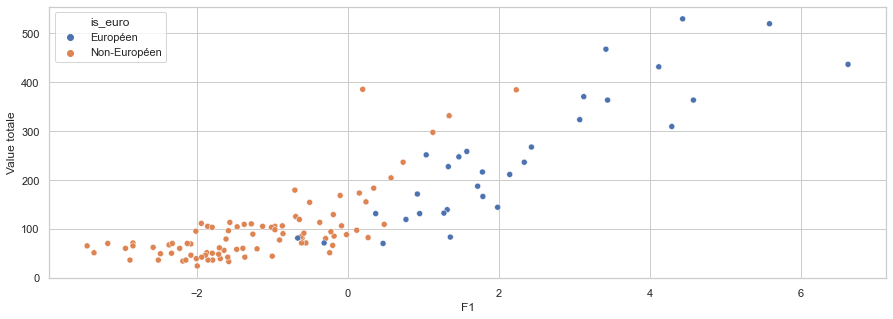

Covariance empirique :  8.698424238790105
Coefficient de Pearson :  0.6313753694676214

Les valeurs suivent une distribution linéaire


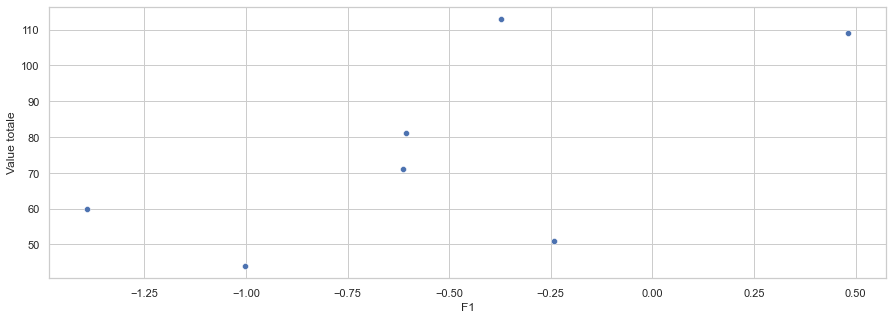

In [295]:
plt.figure(figsize=[15,5])
sns.scatterplot(x='F1',y='Value totale',hue='is_euro',data=all_value)
# sns.lineplot(x='Years',y='Valeur marchande (millions)',data=total,label='Valeurs marchande moyenne')
corré_quant(all_value['F1'],all_value['Value totale'])
plt.show()
plt.figure(figsize=[15,5])
sns.scatterplot(x='F1',y='Value totale',data=all_value[all_value['Team'] == 'Montpellier'])
# sns.lineplot(x='Years',y='Valeur marchande (millions)',data=total,label='Valeurs marchande moyenne')
corré_quant(all_value[all_value['Team'] == 'Montpellier']['F1'],all_value[all_value['Team'] == 'Montpellier']['Value totale'])
plt.show()

In [296]:
all_value.head()

,Rank,Team,Years,PTS,win_rate,unwin_rate,G,GA,xG,xGA,Value totale,Value attaque,Value défense,coef défense,coef attaque,is_euro,is_euro_detail,F1,F2
0,1,Paris Saint Germain,2014,83.0,0.632,0.368,83.0,36.0,78.42,28.24,363,97.8,80.750,1.060381,1.080608,Européen,CL,4.578064,-0.421167
1,1,Paris Saint Germain,2015,96.0,0.789,0.211,102.0,19.0,86.20,24.37,436,139.5,96.562,1.062208,1.090309,Européen,CL,6.626384,-1.384009
2,2,Paris Saint Germain,2016,87.0,0.711,0.289,83.0,27.0,82.16,24.25,519,168.7,98.438,1.061464,1.036588,Européen,CL,5.585874,-0.307883
7,2,Lyon,2014,75.0,0.579,0.421,72.0,33.0,62.85,41.71,144,37.7,23.438,1.027516,1.036084,Européen,CL,1.984164,-1.793368
8,2,Lyon,2015,65.0,0.500,0.500,67.0,43.0,63.01,38.01,166,37.9,30.688,1.056758,1.044679,Européen,CL,1.788890,-0.681725


In [297]:
var_F2 = []
for i,a in zip(all_value['Value défense'],all_value['coef défense']):
    var_F2.append((a ** 3))
    print(i,'|',a,'|',(a ** 3))

80.75 | 1.0603806666666666 | 1.1922996120597746
96.562 | 1.0622078571428573 | 1.198473756953096
98.438 | 1.0614642105263157 | 1.195958381622884
23.438 | 1.0275156250000002 | 1.0848390362017866
30.688 | 1.0567582352941174 | 1.1801220442037195
34.875 | 1.057420625 | 1.182342582686708
59.938 | 1.030464375 | 1.0942056327530343
80.5 | 1.0161225 | 1.0491514958208883
59.125 | 1.0423926666666667 | 1.1326456000414538
81.312 | 1.04893375 | 1.154101958113339
23.25 | 1.0134917647058823 | 1.0410238331373827
37.688 | 1.027272631578947 | 1.0840695693226579
59.938 | 1.0216694444444443 | 1.0664272030097603
69.812 | 1.0345558823529413 | 1.1072912375646946
66.938 | 1.016983125 | 1.0518195529881904
60.312 | 1.0223475000000002 | 1.068551892850626
79.125 | 1.0129727777777775 | 1.0394253954503614
24.125 | 1.01863 | 1.0569376967426467
28.938 | 1.0273011111111108 | 1.084159734238437
12.125 | 1.0304811111111112 | 1.0942589476805102
31.938 | 1.028027777777778 | 1.086462019712985
33.188 | 1.007266315789474 | 1.02

Covariance empirique :  191.8834499921276
Coefficient de Pearson :  0.8675419927558707

Les valeurs suivent une distribution linéaire


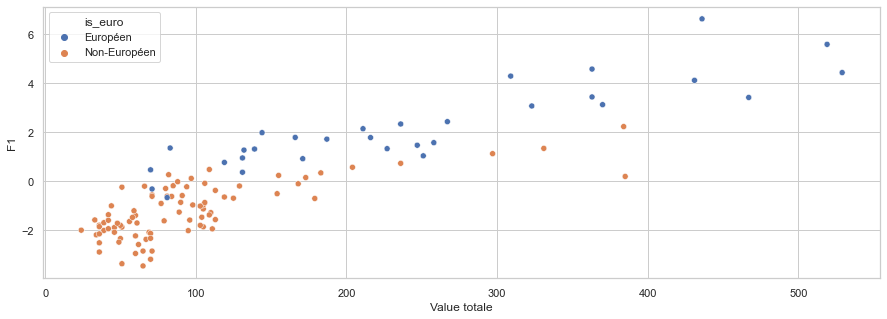

Covariance empirique :  -0.2863670206794097
Coefficient de Pearson :  -0.4346643858664567

Les valeurs suivent une distribution linéaire


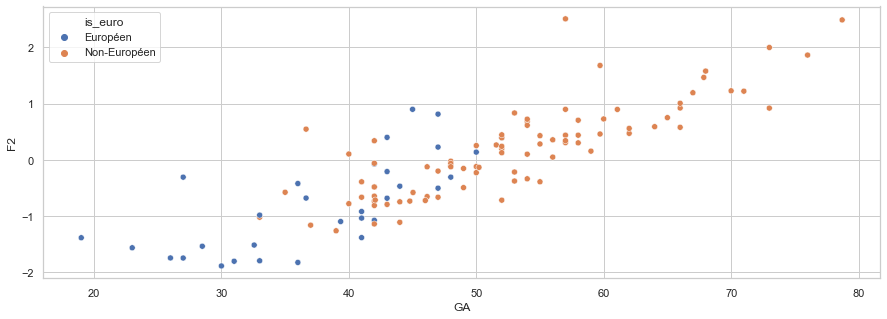

In [298]:
plt.figure(figsize=[15,5])
sns.scatterplot(x='Value totale',y='F1',hue='is_euro',data=all_value)
# sns.lineplot(x='Years',y='Valeur marchande (millions)',data=total,label='Valeurs marchande moyenne')
corré_quant(all_value['Value totale'],all_value['F1'])
plt.show()
plt.figure(figsize=[15,5])
sns.scatterplot(x='GA',y='F2',hue='is_euro',data=all_value)
# sns.lineplot(x='Years',y='Valeur marchande (millions)',data=total,label='Valeurs marchande moyenne')
corré_quant(var_F2,all_value['xGA'])
plt.show()

In [300]:
# Déterminer la fonction de la trend
x = all_value['Value totale']
y_F1= all_value['F1']
y_F2= all_value['F2']
z_F1 = np.polyfit(x,y_F1,1)
z_F2 = np.polyfit(x,y_F2,1)
print ("{0}x + {1}".format(*z_F1))
print ("{0}x + {1}".format(*z_F2))
y_list_F1 = []
y_list_F2 = []
for i in x:
    y_list_F1.append(0.01530768536983698*i + -2.375130207766354)
    y_list_F2.append(0.0001299120895824345*i + -0.0954411113218135)

0.01530768536983698x + -2.375130207766354
0.0001299120895824345x + -0.0954411113218135


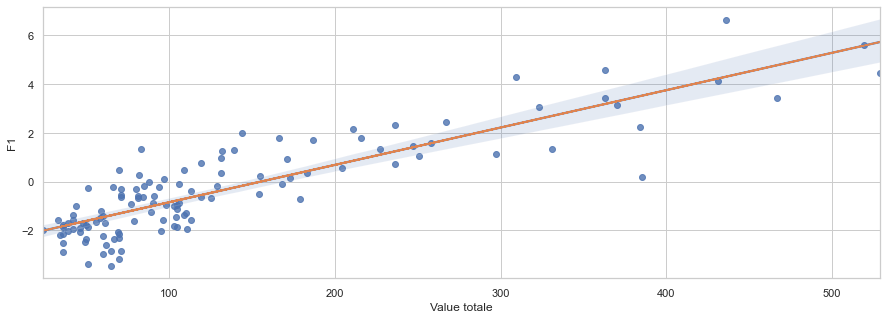

In [301]:
plt.figure(figsize=[15,5])
sns.regplot(x='Value totale',y='F1',data=all_value)
plt.plot(all_value['Value totale'],y_list_F1)
# corré_quant(all_value['Value totale'],all_value['F1'])
plt.show()

La fonction que nous avons obtenue est correcte puisque la trend du regplot et la fonction se superposent

In [302]:
all_value['trend'] = y_list_F1

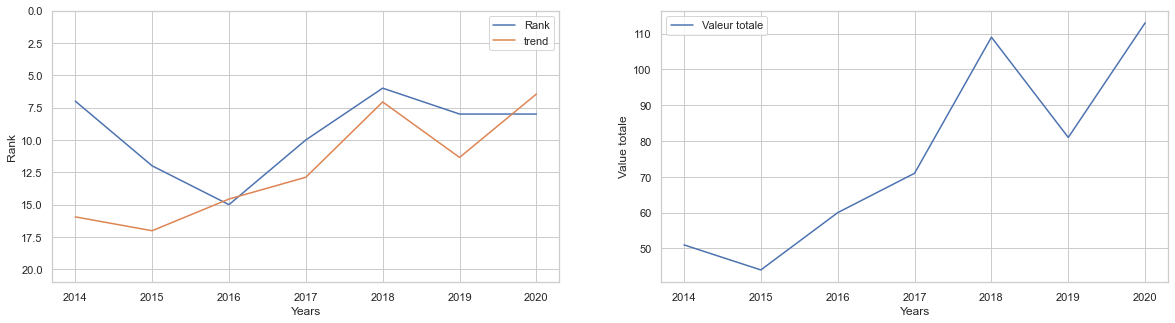

In [303]:
plt.figure(figsize=[20,5])
plt.subplot(121)
list_trend = list(abs(all_value[all_value['Team'] == 'Montpellier']['trend']*10))
list_value = list(abs(all_value[all_value['Team'] == 'Montpellier']['Value totale']/10))
sns.lineplot(x='Years',y='Rank',data=all_value[all_value['Team'] == 'Montpellier'],label='Rank')
sns.lineplot(x='Years',y=list_trend,data=all_value[all_value['Team'] == 'Montpellier'],label='trend')
# sns.lineplot(x='Years',y='Valeur marchande (millions)',data=total,label='Valeurs marchande moyenne')
plt.ylim(21,0)
plt.subplot(122)

sns.lineplot(x='Years',y='Value totale',data=all_value[all_value['Team'] == 'Montpellier'],label='Valeur totale')
plt.show()

A partir des corrélations, on va va prévoir se baser sur 3 variables pour prévoir le futur classement du mhsc :
* Classement
* F1
* Valeur de l'effectif

In [304]:
all_value.columns

Index(['Rank', 'Team', 'Years', 'PTS', 'win_rate', 'unwin_rate', 'G', 'GA',
       'xG', 'xGA', 'Value totale', 'Value attaque', 'Value défense',
       'coef défense', 'coef attaque', 'is_euro', 'is_euro_detail', 'F1', 'F2',
       'trend'],
      dtype='object')

In [305]:
variables = all_value[['Team','Rank','F1','Value totale','Years','is_euro','is_euro_detail','trend','win_rate']]

In [306]:
list_value = []
for i in variables['Value totale']:
    if i < 50:
        list_value.append('> 50 m')
    elif (i >= 50)&(i < 100): 
        list_value.append('50 m < i < 100 m')
    elif (i >= 100)&(i < 200): 
        list_value.append('100 m < i < 200 m')
    elif (i >= 200)&(i < 300): 
        list_value.append('200 m < i < 300 m')
    elif (i >= 300)&(i < 500): 
        list_value.append('300 m < i < 500 m')
    elif i >= 500: 
        list_value.append('> 500 m')
variables['ech_value'] = list_value

<ipython-input-306-c80c14dca3e7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables['ech_value'] = list_value


In [307]:
pal = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

In [308]:
euro_var

NameError: name 'euro_var' is not defined

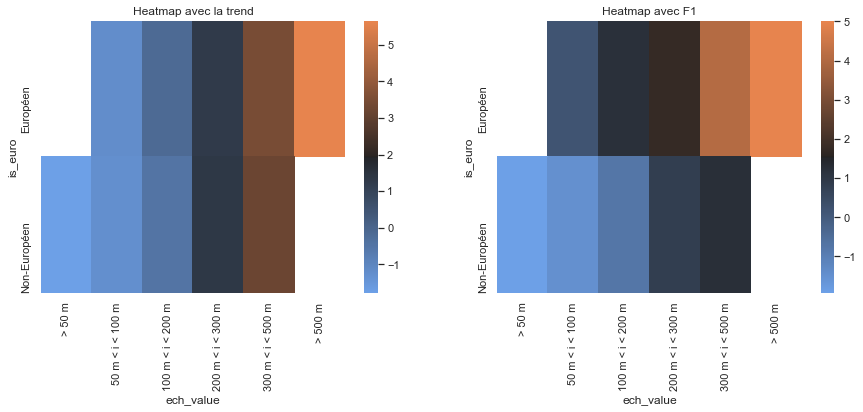

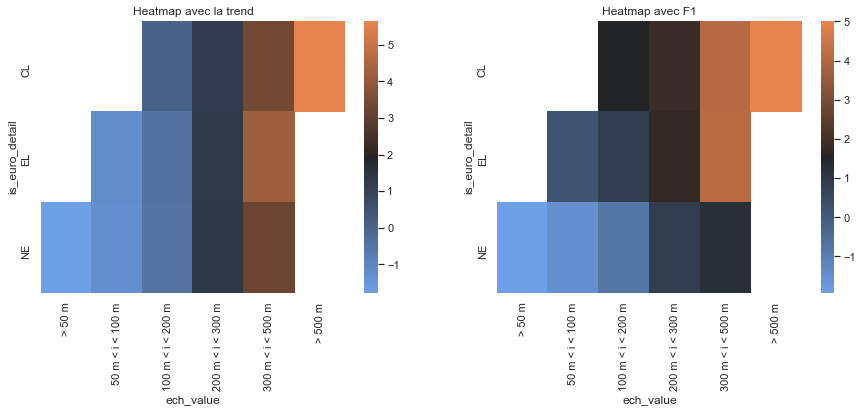

In [309]:
euro_var = variables.groupby(['is_euro','ech_value']).mean().reset_index()[['is_euro','ech_value','trend']].pivot(index='is_euro',columns='ech_value',values='trend')[['> 50 m','50 m < i < 100 m','100 m < i < 200 m','200 m < i < 300 m','300 m < i < 500 m','> 500 m']]
euro_detail_var = variables.groupby(['is_euro_detail','ech_value']).mean().reset_index()[['is_euro_detail','ech_value','trend']].pivot(index='is_euro_detail',columns='ech_value',values='trend')[['> 50 m','50 m < i < 100 m','100 m < i < 200 m','200 m < i < 300 m','300 m < i < 500 m','> 500 m']]
euro_var_F1 = variables.groupby(['is_euro','ech_value']).mean().reset_index()[['is_euro','ech_value','F1']].pivot(index='is_euro',columns='ech_value',values='F1')[['> 50 m','50 m < i < 100 m','100 m < i < 200 m','200 m < i < 300 m','300 m < i < 500 m','> 500 m']]
euro_detail_var_F1 = variables.groupby(['is_euro_detail','ech_value']).mean().reset_index()[['is_euro_detail','ech_value','F1']].pivot(index='is_euro_detail',columns='ech_value',values='F1')[['> 50 m','50 m < i < 100 m','100 m < i < 200 m','200 m < i < 300 m','300 m < i < 500 m','> 500 m']]
plt.figure(figsize=[15,5])
plt.subplot(121)
sns.heatmap(euro_var,cmap=pal)
plt.title('Heatmap avec la trend')
plt.subplot(122)
sns.heatmap(euro_var_F1,cmap=pal)
plt.title('Heatmap avec F1')
plt.show()
plt.figure(figsize=[15,5])
plt.subplot(121)
sns.heatmap(euro_detail_var,cmap=pal)
plt.title('Heatmap avec la trend')
plt.subplot(122)
sns.heatmap(euro_detail_var_F1,cmap=pal)
plt.title('Heatmap avec F1')
plt.show()

### Prédictions 

Régression logistique

K-Means

In [310]:
# <!-- * analyse de la variance -->

In [311]:
variables.head()

,Team,Rank,F1,Value totale,Years,is_euro,is_euro_detail,trend,win_rate,ech_value
0,Paris Saint Germain,1,4.578064,363,2014,Européen,CL,3.181560,0.632,300 m < i < 500 m
1,Paris Saint Germain,1,6.626384,436,2015,Européen,CL,4.299021,0.789,300 m < i < 500 m
2,Paris Saint Germain,2,5.585874,519,2016,Européen,CL,5.569558,0.711,> 500 m
7,Lyon,2,1.984164,144,2014,Européen,CL,-0.170824,0.579,100 m < i < 200 m
8,Lyon,2,1.788890,166,2015,Européen,CL,0.165946,0.500,100 m < i < 200 m


#### K-Means 

C:\Users\gormt\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


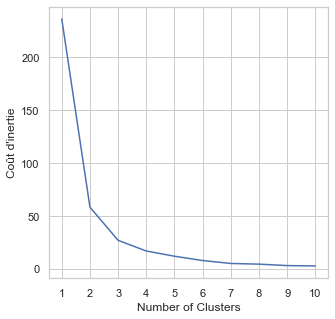

In [312]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition,preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

data = variables[["trend","Value totale"]]
X = data.values
X_scaled = preprocessing.StandardScaler().fit_transform(X)

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    
fig_1 = plt.figure(figsize=(5,5))

#plt.style.use("fivethirtyeight")
sns.set(style="whitegrid")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Coût d'inertie")
plt.savefig('graph_cout_inert.png')
plt.show()

In [313]:
# Projection des individus
# Réduire  ici est nécessaire car les variables sont pas exprimées dans la même unité
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

#X_projected = pca.transform(X_scaled)

# Clustering par K-means
# 2 clusters
km = KMeans(n_clusters=2)
km.fit(X_scaled)
y_means = km.predict(X_scaled)

km3 = KMeans(n_clusters=3)
km3.fit(X_scaled)
y_means3 = km3.predict(X_scaled)

clust_lab3 = km3.labels_

ValueError: 'c' argument has 118 elements, which is inconsistent with 'x' and 'y' with size 122.

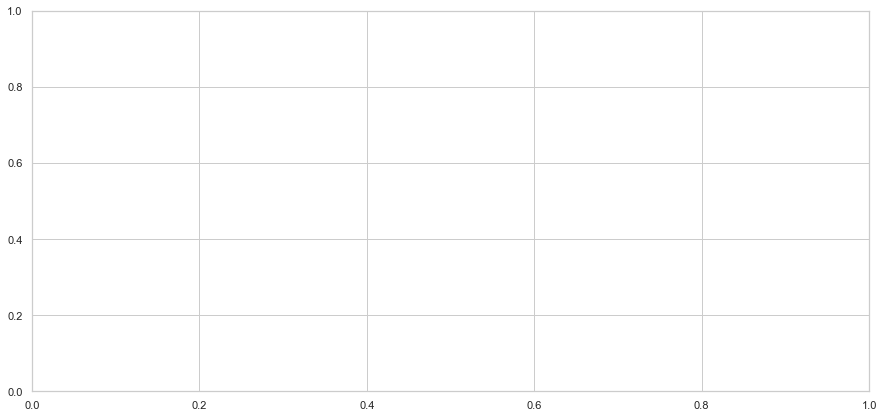

In [314]:
import matplotlib.patches as mpatches
# Visualisation de nos deux clusters dans le premier plan factoriel

plt.figure(figsize=(15, 7))

categories = km.labels_
colormap = np.array(['royalblue','coral'])
sns.set(style="whitegrid")
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=colormap[categories], 
            alpha=0.5, edgecolors='black', linewidths=1.4, s=85)

lab_0 = mpatches.Patch(color='royalblue', alpha=0.5, label='0')
lab_1 = mpatches.Patch(color='coral', alpha=0.5, label='1')
lab_2 = mpatches.Patch(color='grey', alpha=0.5, label='1')
plt.legend(handles=[lab_0, lab_1])

plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)),fontsize='large')
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)),fontsize='large')
plt.title("Projection en 2 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))
plt.savefig('project_ind_kmeans.png')
plt.show()

plt.figure(figsize=(15, 7))
categories3 = km3.labels_
colormap = np.array(['royalblue','coral','grey'])
sns.set(style="whitegrid")
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=colormap[categories3], 
            alpha=0.5, edgecolors='black', linewidths=1.4, s=85)

lab_0 = mpatches.Patch(color='royalblue', alpha=0.5, label='0')
lab_1 = mpatches.Patch(color='coral', alpha=0.5, label='1')
lab_2 = mpatches.Patch(color='grey', alpha=0.5, label='2')
plt.legend(handles=[lab_0, lab_1, lab_2])

plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)),fontsize='large')
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)),fontsize='large')
plt.title("Projection en 3 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))
plt.savefig('project_ind_kmeans.png')
plt.show()

In [315]:
variables['clusters'] = categories
# variables['clusters_3'] = categories3

<ipython-input-315-10f62482c47d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables['clusters'] = categories


In [316]:
variables

,Team,Rank,F1,Value totale,Years,is_euro,is_euro_detail,trend,win_rate,ech_value,clusters
0,Paris Saint Germain,1,4.578064,363,2014,Européen,CL,3.181560,0.632,300 m < i < 500 m,1
1,Paris Saint Germain,1,6.626384,436,2015,Européen,CL,4.299021,0.789,300 m < i < 500 m,1
2,Paris Saint Germain,2,5.585874,519,2016,Européen,CL,5.569558,0.711,> 500 m,1
7,Lyon,2,1.984164,144,2014,Européen,CL,-0.170824,0.579,100 m < i < 200 m,0
8,Lyon,2,1.788890,166,2015,Européen,CL,0.165946,0.500,100 m < i < 200 m,0
...,...,...,...,...,...,...,...,...,...,...,...
117,Strasbourg,11,-0.582303,91,2019,Non-Européen,NE,-0.982131,0.395,50 m < i < 100 m,0
118,Strasbourg,15,-1.373243,109,2020,Non-Européen,NE,-0.706593,0.289,100 m < i < 200 m,0
119,Nimes,18,-2.482718,49,2019,Non-Européen,NE,-1.625054,0.263,> 50 m,0
120,Nimes,19,-2.945970,60,2020,Non-Européen,NE,-1.456669,0.237,50 m < i < 100 m,0


<AxesSubplot:xlabel='clusters', ylabel='is_euro'>

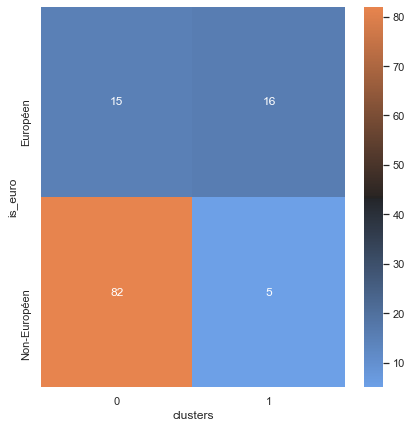

In [317]:
euro = pd.crosstab(variables['is_euro'], variables["clusters"],margins=True,margins_name='Total')
# euro_bis = pd.crosstab(variables['is_euro_detail'], variables["clusters_3"],margins=True,margins_name='Total')
plt.figure(figsize=(10, 7))
plt.subplot(121)
sns.heatmap(euro.iloc[0:2,0:-1],annot=True, cmap=pal)
# plt.subplot(122)
# sns.heatmap(euro_bis.iloc[0:3,0:-1],annot=True, cmap=pal)
# plt.show()

Résultat beaucoup trop approximatif pour le second K-Means

Cependant, on peut poursuivre l'analyse avec le premier K-Means dont les résultats sont pas si mauvais, seulement 5 faux-négatifs et faux-positifs

In [318]:
from sklearn.model_selection import train_test_split
variables_corr = variables[['Team','Rank','trend','Value totale','Years','is_euro','ech_value','clusters','win_rate']]
list_euro = []
for i in variables_corr['is_euro']:
    if i == 'Européen':
        list_euro.append(1)
    elif i == 'Non-Européen':
        list_euro.append(0)
variables_corr['is_euro'] = list_euro 
xtrain, xtest, ytrain, ytest = train_test_split(variables_corr[['trend']], variables_corr[['is_euro']], train_size=0.8)

<ipython-input-318-be139310768c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables_corr['is_euro'] = list_euro


In [319]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import pickle

modele_logit = LogisticRegression()
modele_logit.fit(xtrain,ytrain)
precision = modele_logit.score(xtest,ytest)

with open('model_mhsc.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(modele_logit)

C:\Users\gormt\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


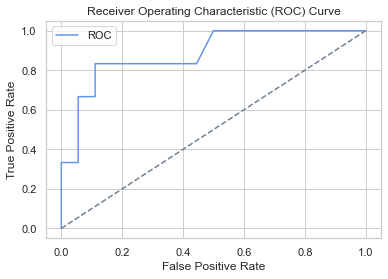

In [320]:
probs = modele_logit.predict_proba(xtest)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(ytest, probs) 
plot_roc_curve(fper, tper)

#### Matrice de confusion

In [321]:
variables_corr = variables_corr.reset_index()
ytest = ytest.reset_index()

In [322]:
variables_corr

,index,Team,Rank,trend,Value totale,Years,is_euro,ech_value,clusters,win_rate
0,0,Paris Saint Germain,1,3.181560,363,2014,1,300 m < i < 500 m,1,0.632
1,1,Paris Saint Germain,1,4.299021,436,2015,1,300 m < i < 500 m,1,0.789
2,2,Paris Saint Germain,2,5.569558,519,2016,1,> 500 m,1,0.711
3,7,Lyon,2,-0.170824,144,2014,1,100 m < i < 200 m,0,0.579
4,8,Lyon,2,0.165946,166,2015,1,100 m < i < 200 m,0,0.500
...,...,...,...,...,...,...,...,...,...,...
113,117,Strasbourg,11,-0.982131,91,2019,0,50 m < i < 100 m,0,0.395
114,118,Strasbourg,15,-0.706593,109,2020,0,100 m < i < 200 m,0,0.289
115,119,Nimes,18,-1.625054,49,2019,0,> 50 m,0,0.263
116,120,Nimes,19,-1.456669,60,2020,0,50 m < i < 100 m,0,0.237


In [323]:
data_predict = pd.merge(variables_corr,ytest,how = 'inner',on='index')
data_predict = data_predict.drop(['index'],axis=1)

In [324]:
data_predict

,Team,Rank,trend,Value totale,Years,is_euro_x,ech_value,clusters,win_rate,is_euro_y
0,Paris Saint Germain,1,3.181560,363,2014,1,300 m < i < 500 m,1,0.632,1
1,Lyon,3,3.181560,363,2017,1,300 m < i < 500 m,1,0.605,1
2,Marseille,5,1.574253,258,2018,1,200 m < i < 300 m,1,0.474,1
3,Saint-Etienne,6,-0.890285,97,2015,0,50 m < i < 100 m,0,0.447,0
4,Saint-Etienne,17,-0.783131,104,2019,0,100 m < i < 200 m,0,0.289,0
5,Montpellier,15,-1.456669,60,2016,0,50 m < i < 100 m,0,0.263,0
6,Montpellier,8,-1.135208,81,2019,0,50 m < i < 100 m,0,0.395,0
7,Lille,17,-0.905592,96,2017,0,50 m < i < 100 m,0,0.263,0
8,Lille,2,1.712022,267,2018,1,200 m < i < 300 m,1,0.579,1
9,Rennes,10,0.196561,168,2018,0,100 m < i < 200 m,0,0.342,0


In [325]:
predict = pd.crosstab(data_predict['is_euro_x'], data_predict["is_euro_y"],rownames=['Actual'], colnames=['Predicted'],margins=True,margins_name='Total')

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

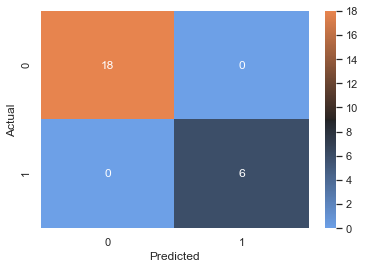

In [326]:
sns.heatmap(predict.iloc[0:2,0:-1],annot=True, cmap=pal)

In [327]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(' ')
print('Precision: %.3f' % precision_score(data_predict['is_euro_x'], data_predict["is_euro_y"]))
print('Recall: %.3f' % recall_score(data_predict['is_euro_x'], data_predict["is_euro_y"]))
print('Accuracy: %.3f' % accuracy_score(data_predict['is_euro_x'], data_predict["is_euro_y"]))
print('F1 Score: %.3f' % f1_score(data_predict['is_euro_x'], data_predict["is_euro_y"]))

 
Precision: 1.000
Recall: 1.000
Accuracy: 1.000
F1 Score: 1.000


In [328]:
print(sklearn.metrics.classification_report(data_predict['is_euro_x'], data_predict["is_euro_y"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [329]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import Logit
mode = Logit(endog=ytrain,exog=xtrain)
lr = mode.fit()

lr.summary()

Optimization terminated successfully.
         Current function value: 0.472333
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_euro   No. Observations:                   94
Model:                          Logit   Df Residuals:                       93
Method:                           MLE   Df Model:                            0
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:                  0.1845
Time:                        10:16:31   Log-Likelihood:                -44.399
converged:                       True   LL-Null:                       -54.444
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trend          1.1285      0.231      4.883      0.000       0.675       1.581
==============================================================================
"""